<a href="https://colab.research.google.com/github/Harish-or-Peter/World-Bank-Global-Education-Analysis---Capstone-Project/blob/main/World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [2]:
#Import required libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [5]:
#Extacting data 
drive.mount('/content/drive')
EdStatsCountry_Series_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - 1/Data/EdStatsCountry-Series.csv')
EdStatsCountry_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - 1/Data/EdStatsCountry.csv')
EdStatsData_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - 1/Data/EdStatsData.csv')
EdStatsFootNote_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - 1/Data/EdStatsFootNote.csv')
EdStatsSeries_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - 1/Data/EdStatsSeries.csv')

Mounted at /content/drive


In [6]:
#Knowing the data
print('############################Shape: \n', EdStatsCountry_Series_df.shape )
print('############################info:')
print(EdStatsCountry_Series_df.info())
print('############################Description:\n',EdStatsCountry_Series_df.describe())
EdStatsCountry_Series_df.head()

############################Shape: 
 (613, 4)
############################info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
None
############################Description:
        Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [7]:
#Filtering the data
EdStatsCountry_Series_df.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [8]:
#No doubt to say Unnamed: 3 must be droped out as it contains all null values
EdStatsCountry_Series_df.drop("Unnamed: 3",axis=1, inplace=True)

In [9]:
#Understand data and withdraw meaningful informations for this table
len(pd.unique(EdStatsCountry_Series_df['CountryCode']))

211

In [10]:
#formatting the data 
EdStatsCountry_Series_df['DataSource']=EdStatsCountry_Series_df['DESCRIPTION'].apply(lambda inp: inp.strip().replace('Data sources : ', '').replace('Data sources: ', '').replace('.', ''))
data_source_df=EdStatsCountry_Series_df.groupby(['DataSource'])['CountryCode'].agg('count').reset_index()
data_source_df.rename(columns = {"CountryCode":"Country Count"}, inplace=True)
data_source_df.head()

DataSource  Country Count
0              Australian Bureau of Statistics              2
1             Based on official exchange rates              1
2  Bermuda Government Department of Statistics              2
3             Census and Statistics Department              2
4                 Central Bureau of Statistics              2

Text(0, 0.5, 'Country Count')

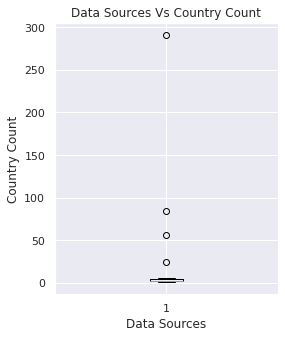

In [11]:
plt.rcParams["figure.figsize"] = (4,5)
data_source_df_plot=plt.boxplot(data_source_df['Country Count'])
plt.title('Data Sources Vs Country Count')
plt.xlabel('Data Sources')
plt.ylabel('Country Count')

Con:Most of the data sources are used by onle one country, only few are used in multiple countries

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

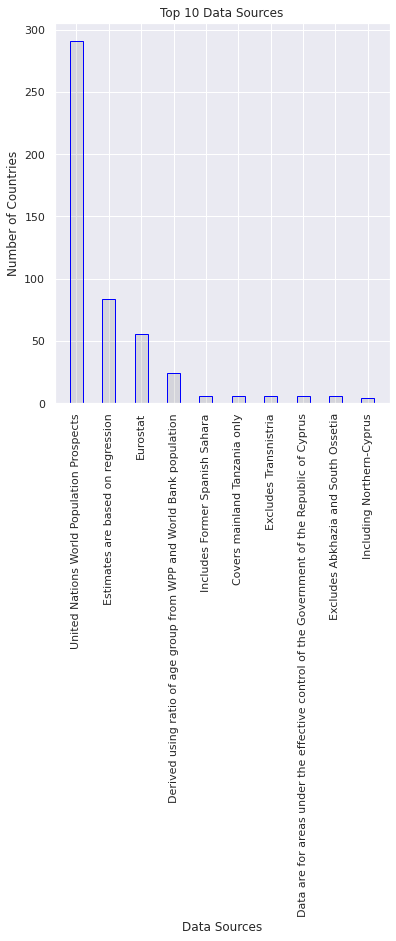

In [12]:
data_source_df=data_source_df.sort_values("Country Count", ascending=False).head(10)
plt.rcParams["figure.figsize"] = (6,7)
plt.bar(data_source_df['DataSource'].values,data_source_df['Country Count'].values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue' ,width = 0.4)
plt.title('Top 10 Data Sources')
plt.ylabel('Number of Countries')
plt.xlabel('Data Sources')
plt.xticks(rotation = 90) 


Con:United Nations World Population Prospects is most used data source

In [13]:
print('############################Shape: \n', EdStatsCountry_df.shape)
print('############################info:')
print(EdStatsCountry_df.info())
print('############################Description:\n',EdStatsCountry_df.describe())
EdStatsCountry_df.head()

############################Shape: 
 (241, 32)
############################info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Gr

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [15]:
#Filtering the data
EdStatsCountry_df.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [16]:
#remove Unnamed: 31 as it has all values equal to null
EdStatsCountry_df.drop("Unnamed: 31",axis=1, inplace=True)

In [17]:
#Understand data and withdraw meaningful informations for this table
print('number of countries:', len(pd.unique(EdStatsCountry_df['Country Code'])))
EdStatsCountry_df.columns

number of countries: 241


Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [18]:
#It seems there are most countries are covered there so let's map countries with there country code
country_dict=dict(zip(EdStatsCountry_df['Country Code'], EdStatsCountry_df['Short Name']))
print(country_dict)

{'ABW': 'Aruba', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'ALB': 'Albania', 'AND': 'Andorra', 'ARB': 'Arab World', 'ARE': 'United Arab Emirates', 'ARG': 'Argentina', 'ARM': 'Armenia', 'ASM': 'American Samoa', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BDI': 'Burundi', 'BEL': 'Belgium', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh', 'BGR': 'Bulgaria', 'BHR': 'Bahrain', 'BHS': 'The Bahamas', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BMU': 'Bermuda', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'BRB': 'Barbados', 'BRN': 'Brunei', 'BTN': 'Bhutan', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHI': 'Channel Islands', 'CHL': 'Chile', 'CHN': 'China', 'CIV': "Côte d'Ivoire", 'CMR': 'Cameroon', 'COD': 'Dem. Rep. Congo', 'COG': 'Congo', 'COL': 'Colombia', 'COM': 'Comoros', 'CPV': 'Cabo Verde', 'CRI': 'Costa Rica', 'CUB': 'Cuba', 'CUW': 'Curaçao', 'CYM': 'Cayman Islands', 'C

In [19]:
#Grouping of the data on the basis of CurrencyUnit
EdStatsCountry_df1=EdStatsCountry_df.groupby(['Currency Unit'])['Country Code'].agg('count').reset_index()
EdStatsCountry_df1.rename(columns={'Country Code':'Country Count'}, inplace=True)
EdStatsCountry_df1=EdStatsCountry_df1.sort_values('Country Count', ascending=False)
EdStatsCountry_df1

Currency Unit  Country Count
46                    Euro             23
143            U.S. dollar             14
23               CFA franc             14
42   East Caribbean dollar              6
114         Pound sterling              3
..                     ...            ...
55        Honduran lempira              1
56        Hong Kong dollar              1
57        Hungarian forint              1
58           Iceland krona              1
151            Yemeni rial              1

[152 rows x 2 columns]

In [20]:
EdStatsCountry_df1.loc[EdStatsCountry_df1['Country Count'] <= 2, 'Currency Unit'] = 'other'
#other=other currencies which are used by only one country
EdStatsCountry_df1

Currency Unit  Country Count
46                    Euro             23
143            U.S. dollar             14
23               CFA franc             14
42   East Caribbean dollar              6
114         Pound sterling              3
..                     ...            ...
55                   other              1
56                   other              1
57                   other              1
58                   other              1
151                  other              1

[152 rows x 2 columns]

In [21]:
EdStatsCountry_df1=EdStatsCountry_df1.groupby('Currency Unit')['Country Count'].agg('sum').reset_index().set_index('Currency Unit')
EdStatsCountry_df1


Country Count
Currency Unit                       
Australian dollar                  3
CFA franc                         14
Danish krone                       3
East Caribbean dollar              6
Euro                              23
Pound sterling                     3
U.S. dollar                       14
other                            149

Text(0, 0.5, '')

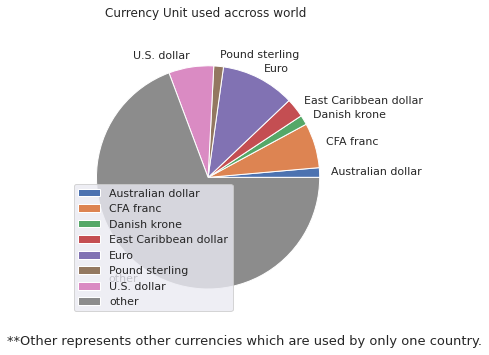

In [23]:
EdStatsCountry_df1.plot.pie(y='Country Count', figsize=(5, 10), title='Currency Unit used accross world \n')
plt.text(-1.8, -1.5, '**Other represents other currencies which are used by only one country.', fontsize = 13)
plt.ylabel('')

Con:Euro is most used currency accross the world

In [24]:
#Grouping the data on the basis of income
EdStatsCountry_df2=EdStatsCountry_df.groupby(['Income Group'])['Country Code'].agg('count').reset_index().set_index('Income Group')
EdStatsCountry_df2

Country Code
Income Group                      
High income: OECD               31
High income: nonOECD            44
Low income                      34
Lower middle income             50
Upper middle income             55

Text(0, 0.5, '')

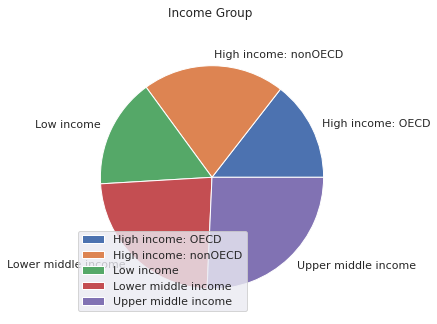

In [25]:
#Ploting of Income Groups
EdStatsCountry_df2.plot.pie(y='Country Code', figsize=(5, 10), title='Income Group \n')
plt.ylabel('')

Con:Half of the countries have either lower middle or upper middle income

In [26]:
EdStatsCountry_df.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [27]:
EdStatsCountry_df['Balance of Payments Manual in use'][:5]

0    IMF Balance of Payments Manual, 6th edition.
1                                             NaN
2    IMF Balance of Payments Manual, 6th edition.
3    IMF Balance of Payments Manual, 6th edition.
4                                             NaN
Name: Balance of Payments Manual in use, dtype: object

In [28]:
#Main Data
print('############################Shape: \n', EdStatsData_df.shape )
print('############################info:')
print(EdStatsData_df.info())
print('############################Description:\n',EdStatsData_df.describe())
EdStatsData_df.head()

############################Shape: 
 (886930, 70)
############################info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [29]:
#Filteration of the data
EdStatsData_df.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [30]:
#remove Unnamed: 69 as it has all values equal to null
EdStatsData_df.drop("Unnamed: 69",axis=1, inplace=True)

In [31]:
EdStatsData_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [32]:
print('Country Code',len(EdStatsData_df['Country Code'].unique()))
print('Indicator Code',len(EdStatsData_df['Indicator Code'].unique()))

Country Code 242
Indicator Code 3665


Con:Each country has exactly 3665 indicators

In [33]:
dff=EdStatsData_df.copy()
dff.drop(['Country Code','Indicator Code', '2017', '2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], axis=1, inplace=True)
dff.columns
dff.set_index('Country Name')

Indicator Name       1970  \
Country Name                                                                 
Arab World    Adjusted net enrolment rate, lower secondary, ...        NaN   
Arab World    Adjusted net enrolment rate, lower secondary, ...        NaN   
Arab World    Adjusted net enrolment rate, lower secondary, ...        NaN   
Arab World    Adjusted net enrolment rate, lower secondary, ...        NaN   
Arab World    Adjusted net enrolment rate, primary, both sex...  54.822121   
...                                                         ...        ...   
Zimbabwe      Youth illiterate population, 15-24 years, male...        NaN   
Zimbabwe      Youth literacy rate, population 15-24 years, b...        NaN   
Zimbabwe      Youth literacy rate, population 15-24 years, f...        NaN   
Zimbabwe      Youth literacy rate, population 15-24 years, g...        NaN   
Zimbabwe      Youth literacy rate, population 15-24 years, m...        NaN   

                   1971       1972       1973       1974      1975       1976  \
Country Name                                                                    
Arab World          NaN        NaN        NaN        NaN       NaN        NaN   
Arab World          NaN        NaN        NaN        NaN       NaN        NaN   
Arab World          NaN        NaN        NaN        NaN       NaN        NaN   
Arab World          NaN        NaN        NaN        NaN       NaN        NaN   
Arab World    54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   
...                 ...        ...        ...        ...       ...        ...   
Zimbabwe            NaN        NaN        NaN        NaN       NaN        NaN   
Zimbabwe            NaN        NaN        NaN        NaN       NaN        NaN   
Zimbabwe            NaN        NaN        NaN        NaN       NaN        NaN   
Zimbabwe            NaN        NaN        NaN        NaN       NaN        NaN   
Zimbabwe            NaN        NaN        NaN        NaN       NaN        NaN   

                  1977      1978  ...       2007       2008       2009  \
Country Name                      ...                                    
Arab World         NaN       NaN  ...        NaN        NaN        NaN   
Arab World         NaN       NaN  ...        NaN        NaN        NaN   
Arab World         NaN       NaN  ...        NaN        NaN        NaN   
Arab World         NaN       NaN  ...        NaN        NaN        NaN   
Arab World    61.92268  62.69342  ...  83.280342  84.011871  84.195961   
...                ...       ...  ...        ...        ...        ...   
Zimbabwe           NaN       NaN  ...        NaN        NaN        NaN   
Zimbabwe           NaN       NaN  ...        NaN        NaN        NaN   
Zimbabwe           NaN       NaN  ...        NaN        NaN        NaN   
Zimbabwe           NaN       NaN  ...        NaN        NaN        NaN   
Zimbabwe           NaN       NaN  ...        NaN        NaN        NaN   

                   2010          2011       2012      2013           2014  \
Country Name                                                                
Arab World          NaN           NaN        NaN       NaN            NaN   
Arab World          NaN           NaN        NaN       NaN            NaN   
Arab World          NaN           NaN        NaN       NaN            NaN   
Arab World          NaN           NaN        NaN       NaN            NaN   
Arab World    85.211998      85.24514  86.101669  85.51194      85.320152   
...                 ...           ...        ...       ...            ...   
Zimbabwe            NaN  166679.00000        NaN       NaN  199464.000000   
Zimbabwe            NaN      90.93070        NaN       NaN      90.428120   
Zimbabwe            NaN      92.12456        NaN       NaN      93.188350   
Zimbabwe            NaN       1.02828        NaN       NaN       1.063890   
Zimbabwe            NaN      89.59058        NaN       NaN      87.591860   

              2

In [34]:
# List of Indicator
indicators=['GDP per capita (current US$)', 
            'Population, total', 
            'Mortality rate, under-5 (per 1,000)', 
            'Population growth (annual %)', 
            'Population of the official age for lower secondary education, both sexes (number)', 
            'Population of the official age for lower secondary education, female (number)',
            'Population of the official age for lower secondary education, male (number)',
            'Population of the official age for primary education, both sexes (number)',
            'Population of the official age for primary education, female (number)',
            'Population of the official age for primary education, male (number)',
            'Population of the official age for secondary education, both sexes (number)',
            'Population of the official age for secondary education, female (number)',
            'Population of the official age for secondary education, male (number)',
            'Population of the official age for tertiary education, both sexes (number)',
            'Population of the official age for tertiary education, female (number)',
            'Population of the official age for tertiary education, male (number)']
xx=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
    '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
    '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
    '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
    '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [35]:
df_list=[]
for indicator in indicators:
  df=dff[dff['Indicator Name']==indicator]
  df['average']=(df[xx].sum(axis=1))/len(xx)
  for index in list(df.index.values):
    na_count=df.loc[[index]].isna().sum().sum()
    if na_count>4:
      df.drop([index], axis=0, inplace=True)
  df.drop(['Indicator Name'], axis=1, inplace=True)
  df=df.set_index('Country Name')
  for i in range(len(df)):
    aa=df.iloc[i]
    for j in range(len(aa)):
      bb=aa[j]
      if np.isnan(bb):
        df.iloc[i][j]=df.iloc[i][47]
  df_list.append(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:

df=df.sort_values(by=['average'], ascending=False)
df.iloc[-7:][:-1]

1970    1971    1972    1973    1974    1975    1976  \
Country Name                                                                  
Dominica             3271.0  3316.0  3239.0  3218.0  3266.0  3408.0  3608.0   
Seychelles           1778.0  2055.0  2374.0  2673.0  2912.0  3091.0  3168.0   
Antigua and Barbuda  3431.0  3538.0  3620.0  3687.0  3740.0  3777.0  3802.0   
Aruba                2872.0  2956.0  3020.0  3052.0  3074.0  3101.0  3146.0   
Bermuda              2415.0  2378.0  2365.0  2378.0  2418.0  2494.0  2588.0   
St. Kitts and Nevis  1535.0  1543.0  1724.0  1858.0  1947.0  2004.0  2047.0   

                       1977    1978    1979  ...    2008    2009    2010  \
Country Name                                 ...                           
Dominica             3917.0  4102.0  4213.0  ...  3397.0  3448.0  3543.0   
Seychelles           3207.0  3247.0  3311.0  ...  4064.0  4068.0  4085.0   
Antigua and Barbuda  3832.0  3871.0  3900.0  ...  3235.0  3312.0  3411.0   
Aruba                3194.0  3244.0  3303.0  ...  3169.0  3141.0  3204.0   
Bermuda              2671.0  2744.0  2806.0  ...  2128.0  2151.0  2153.0   
St. Kitts and Nevis  2194.0  2311.0  2399.0  ...  2377.0  2327.0  2268.0   

                       2011    2012    2013    2014    2015         2016  \
Country Name                                                               
Dominica             3651.0  3714.0  3713.0  3659.0  3545.0  3550.191489   
Seychelles           4085.0  4041.0  3939.0  3851.0  3748.0  3548.914894   
Antigua and Barbuda  3527.0  3636.0  3732.0  3817.0  3890.0  3231.765957   
Aruba                3363.0  3601.0  3770.0  3874.0  3906.0  2965.425532   
Bermuda              2132.0  2100.0  2067.0  2045.0  2030.0  2220.872340   
St. Kitts and Nevis  2211.0  2174.0  2163.0  2181.0  2230.0  2118.617021   

                         average  
Country Name                      
Dominica             3550.191489  
Seychelles           3548.914894  
Antigua and Barbuda  3231.765957  
Aruba                2965.425532  
Bermuda              2220.872340  
St. Kitts and Nevis  2118.617021  

[6 rows x 48 columns]

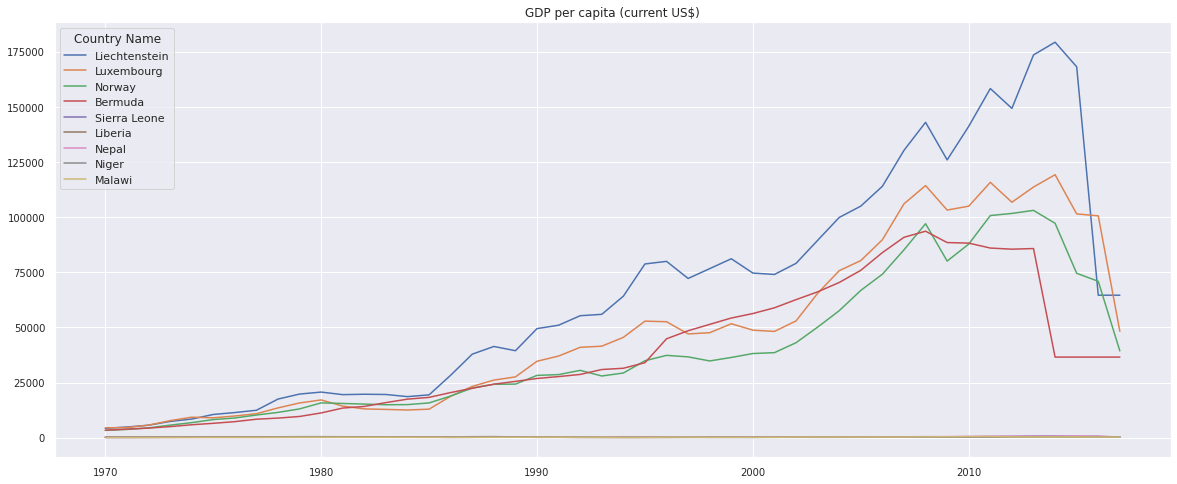

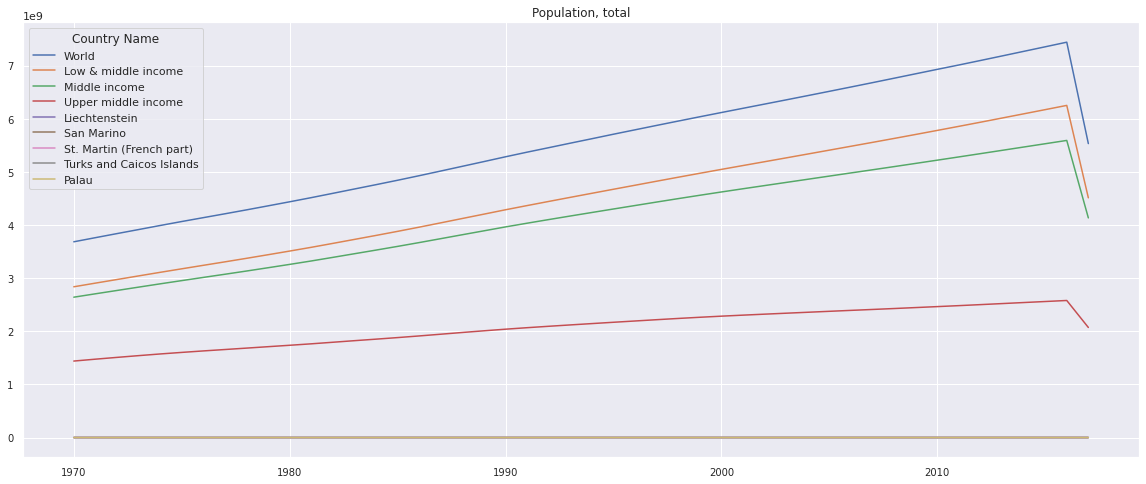

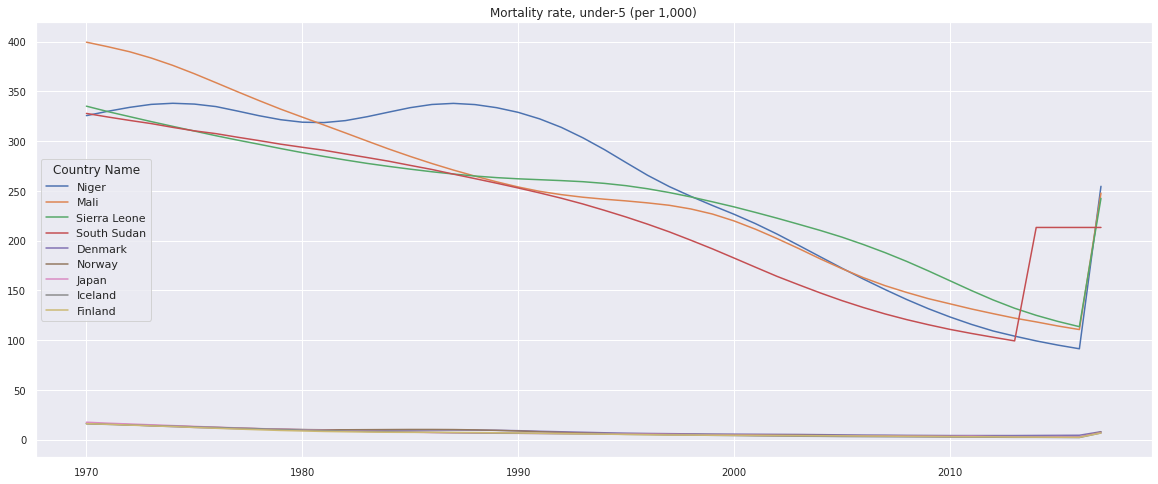

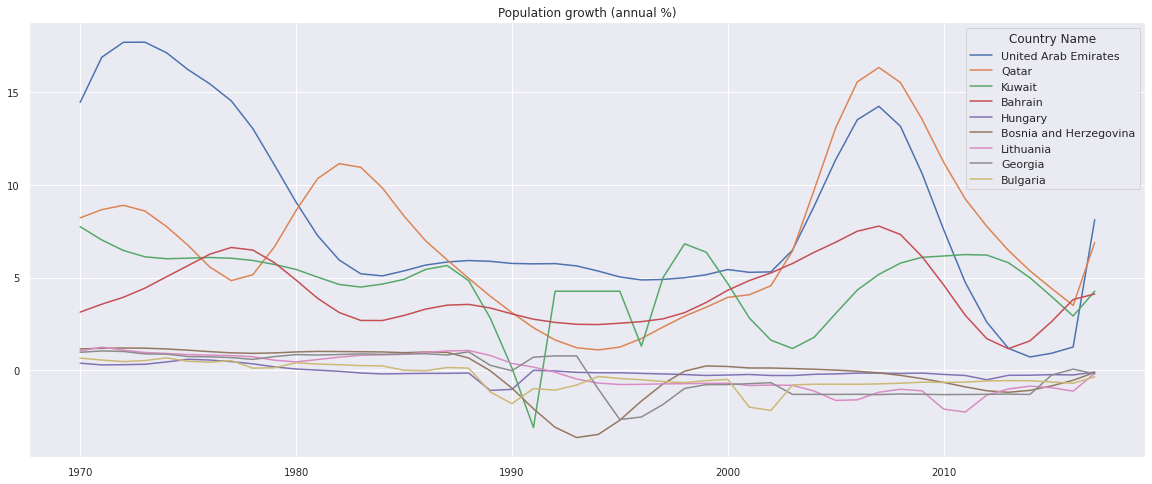

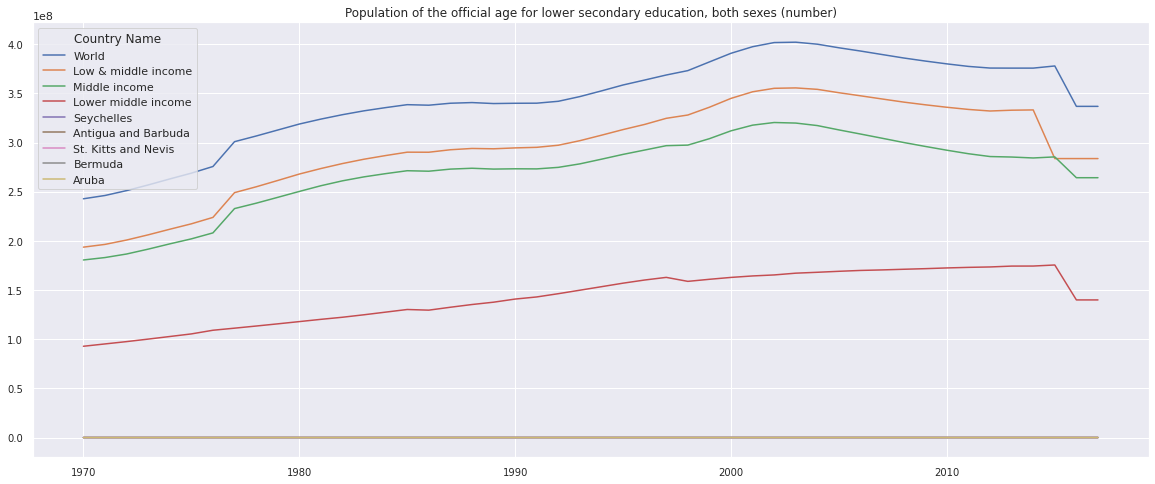

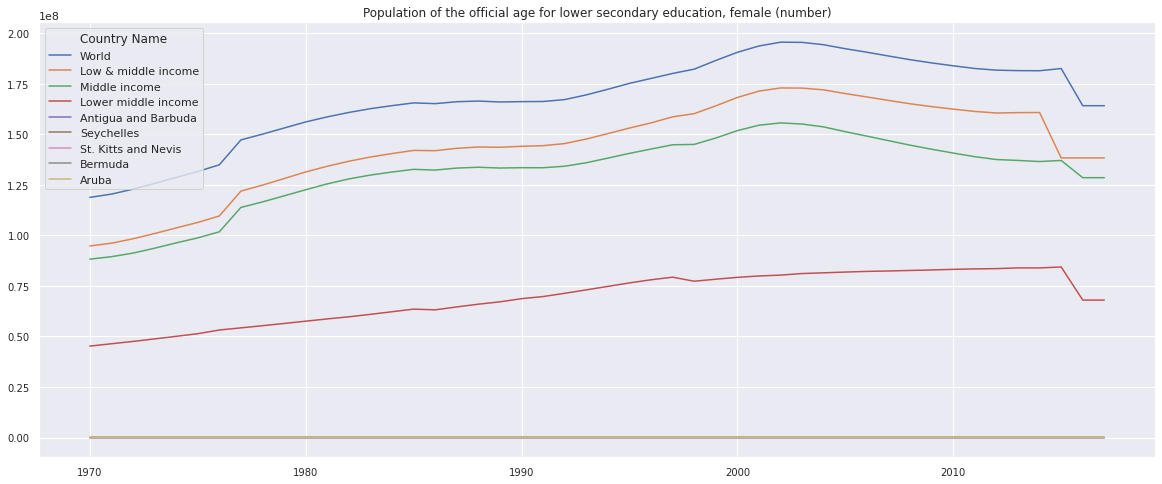

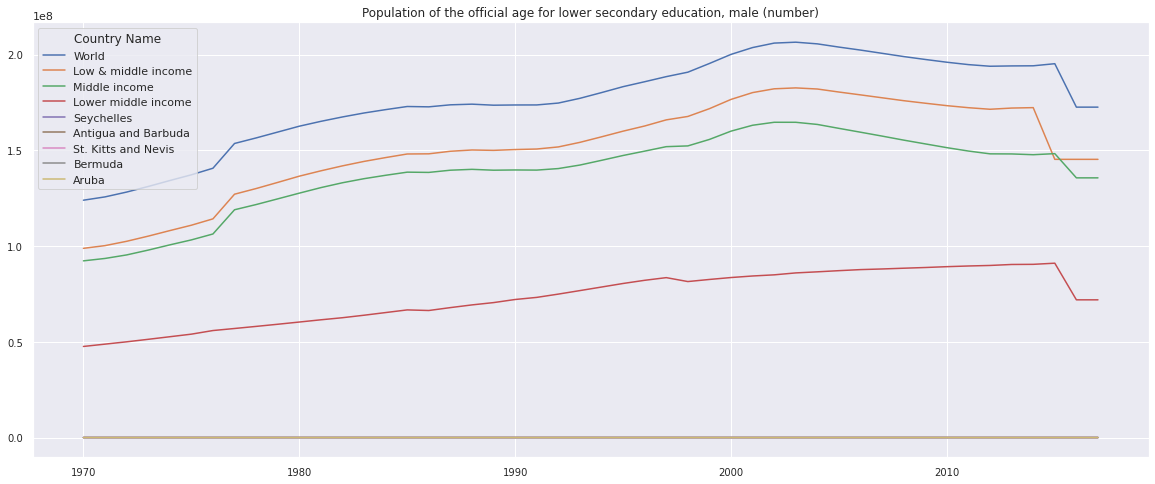

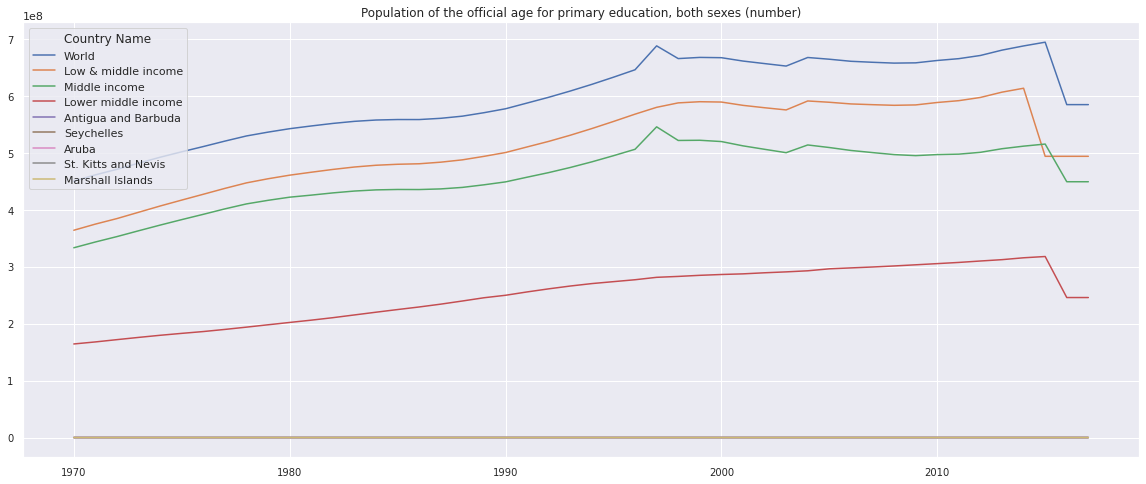

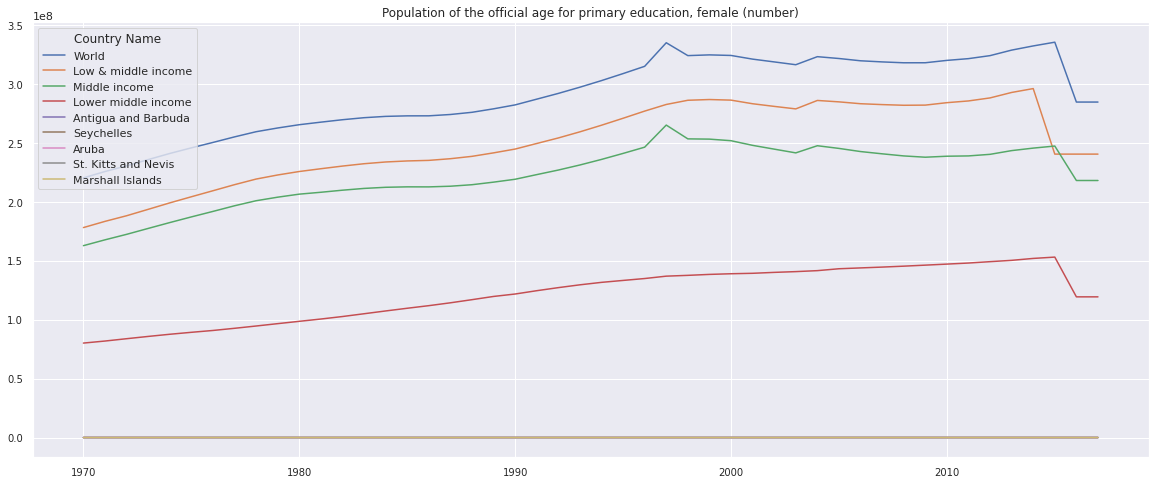

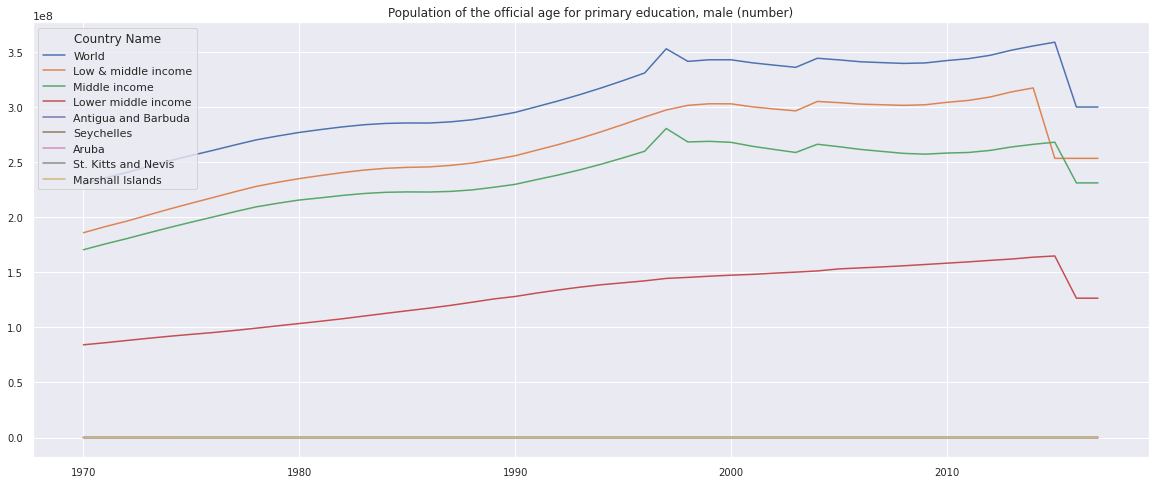

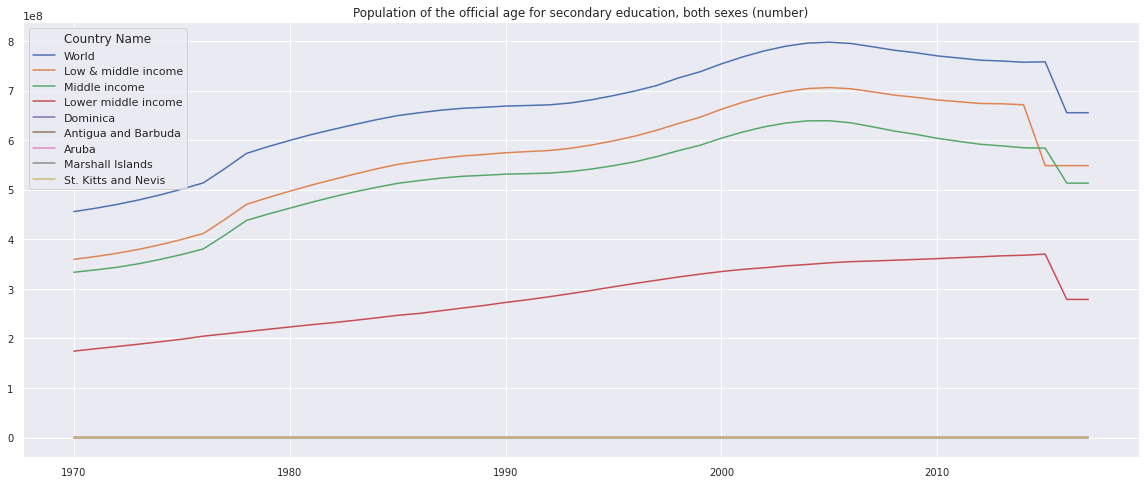

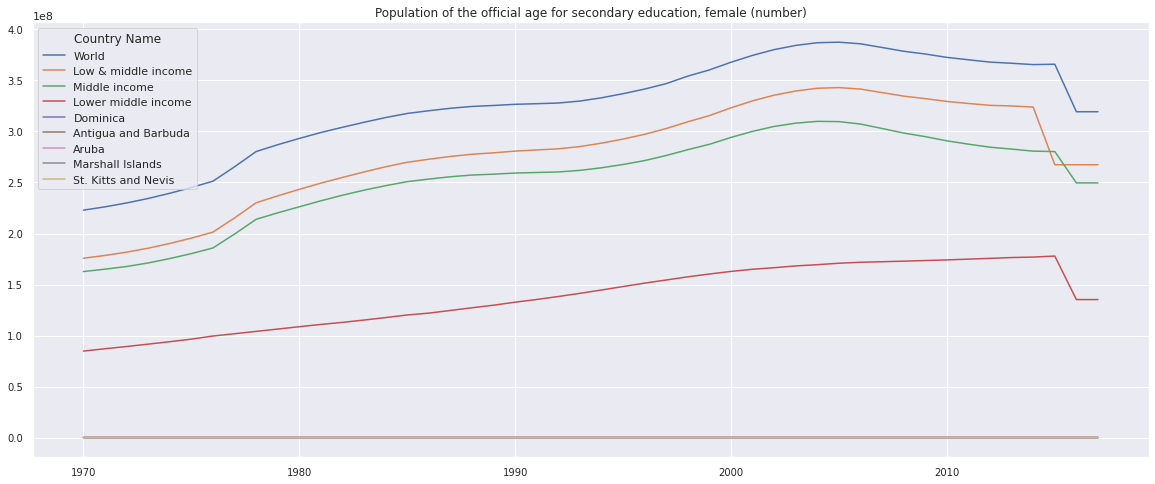

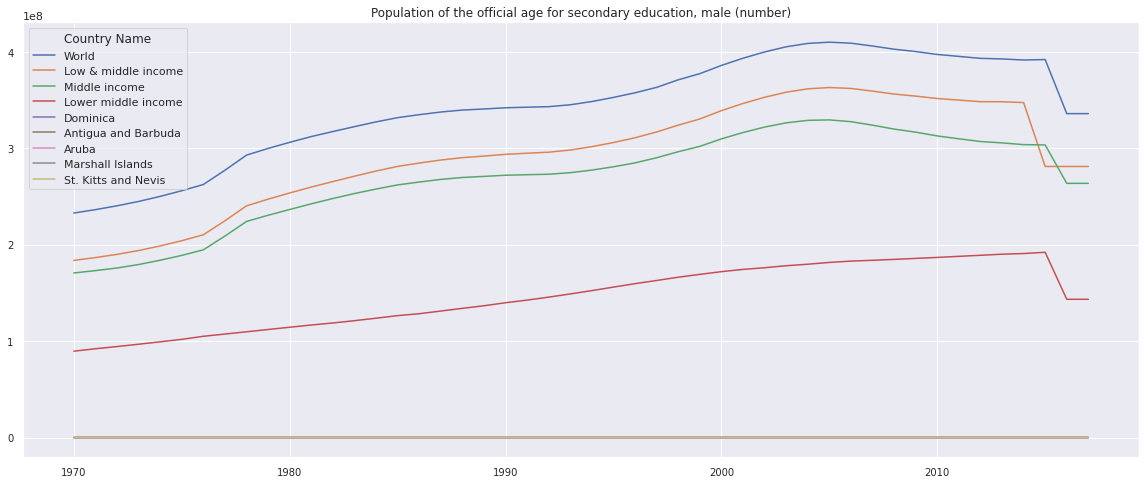

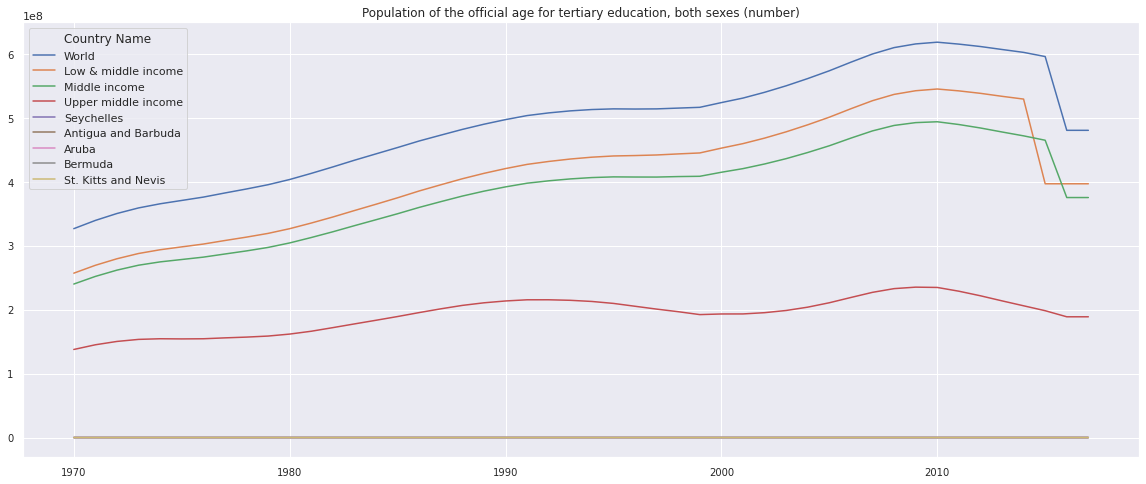

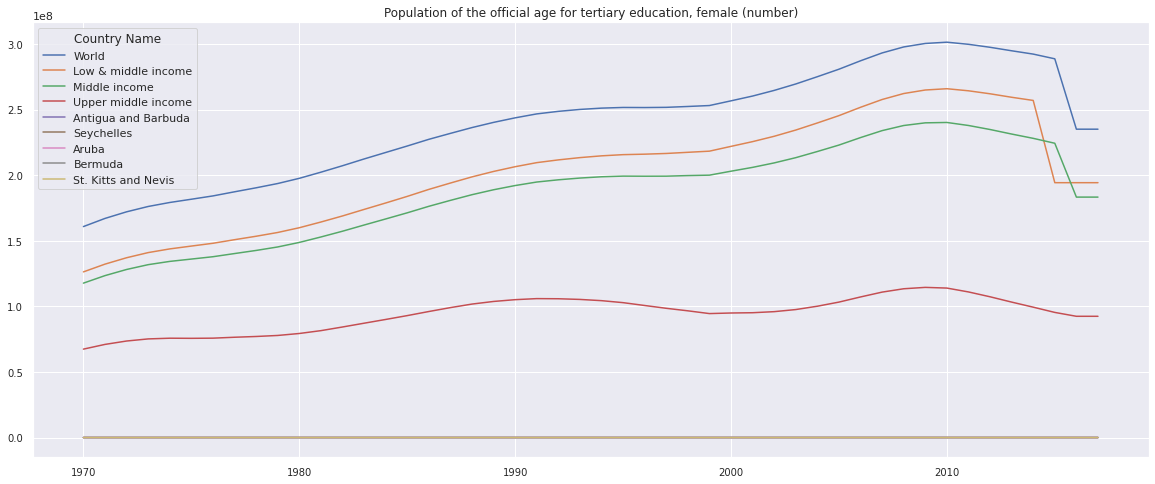

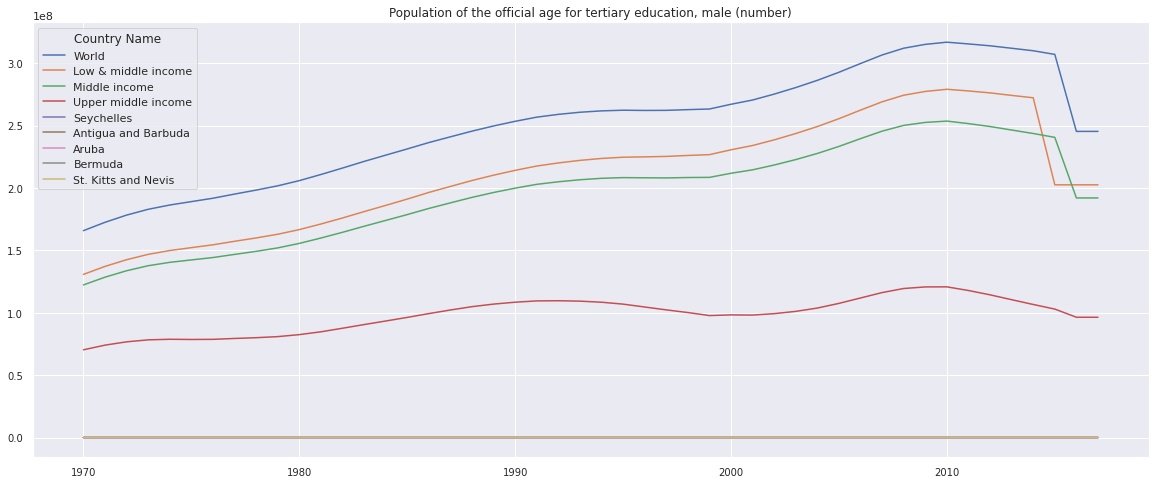

In [37]:
# Line Plot, GDP per Capita of the selected Countries
for x, df in enumerate(df_list):
  df=df.sort_values(by=['average'], ascending=False)
  pd.concat([df.iloc[:5][:-1],df.iloc[-6:][:-1]]).T.plot.line(figsize=(20,8), fontsize=10, title=indicators[x])


In [38]:
df1=df_list[0].copy()
df1.sort_values(by=['average'], ascending=False)
df1.head()

1970         1971  \
Country Name                                                            
Arab World                                    250.488643   283.248047   
East Asia & Pacific                           316.225712   341.976701   
East Asia & Pacific (excluding high income)   114.138515   119.431083   
Euro area                                    2231.949573  2515.596733   
Europe & Central Asia                        1365.643199  1528.448449   

                                                    1972         1973  \
Country Name                                                            
Arab World                                    328.692870   406.804635   
East Asia & Pacific                           414.419302   534.343604   
East Asia & Pacific (excluding high income)   132.172416   162.667008   
Euro area                                    3018.225027  3892.275241   
Europe & Central Asia                        1816.387284  2288.484922   

                                                    1974         1975  \
Country Name                                                            
Arab World                                    758.562998   817.393647   
East Asia & Pacific                           602.491430   647.331204   
East Asia & Pacific (excluding high income)   179.964175   198.501765   
Euro area                                    4387.668484  5061.325652   
Europe & Central Asia                        2565.851489  2975.588372   

                                                    1976         1977  \
Country Name                                                            
Arab World                                    987.361288  1102.244479   
East Asia & Pacific                           699.979103   821.537049   
East Asia & Pacific (excluding high income)   198.300853   225.642021   
Euro area                                    5257.948144  5957.004608   
Europe & Central Asia                        3070.760736  3456.521651   

                                                    1978         1979  ...  \
Country Name                                                           ...   
Arab World                                   1179.932809  1541.242707  ...   
East Asia & Pacific                          1020.617194  1091.432824  ...   
East Asia & Pacific (excluding high income)   215.392022   245.180922  ...   
Euro area                                    7266.195056  8767.675162  ...   
Europe & Central Asia                        4190.853585  5093.121487  ...   

                                                     2008          2009  \
Country Name                                                              
Arab World                                    6255.761156   5267.552563   
East Asia & Pacific                           6495.933481   6648.004566   
East Asia & Pacific (excluding high income)   3108.734621   3348.192994   
Euro area                                    42235.248954  38491.672437   
Europe & Central Asia                        26352.539224  23084.226956   

                                                     2010          2011  \
Country Name                                                              
Arab World                                    6032.961957   7005.479541   
East Asia & Pacific                           7679.834203   8844.822997   
East Asia & Pacific (excluding high income)   4010.464900   4867.116671   
Euro area                                    37617.721751  40614.907653   
Europe & Central Asia                        23536.905927  26015.889000   

                                                     2012          2013  \
Country Name                                                              
Arab World                                    7571.402403   7715.998677   
East Asia & Pacific                           9402.722845   9447.701067   
East Asia & Pacific (excluding high income)   5390.929190   5908.427878   
Euro area                     

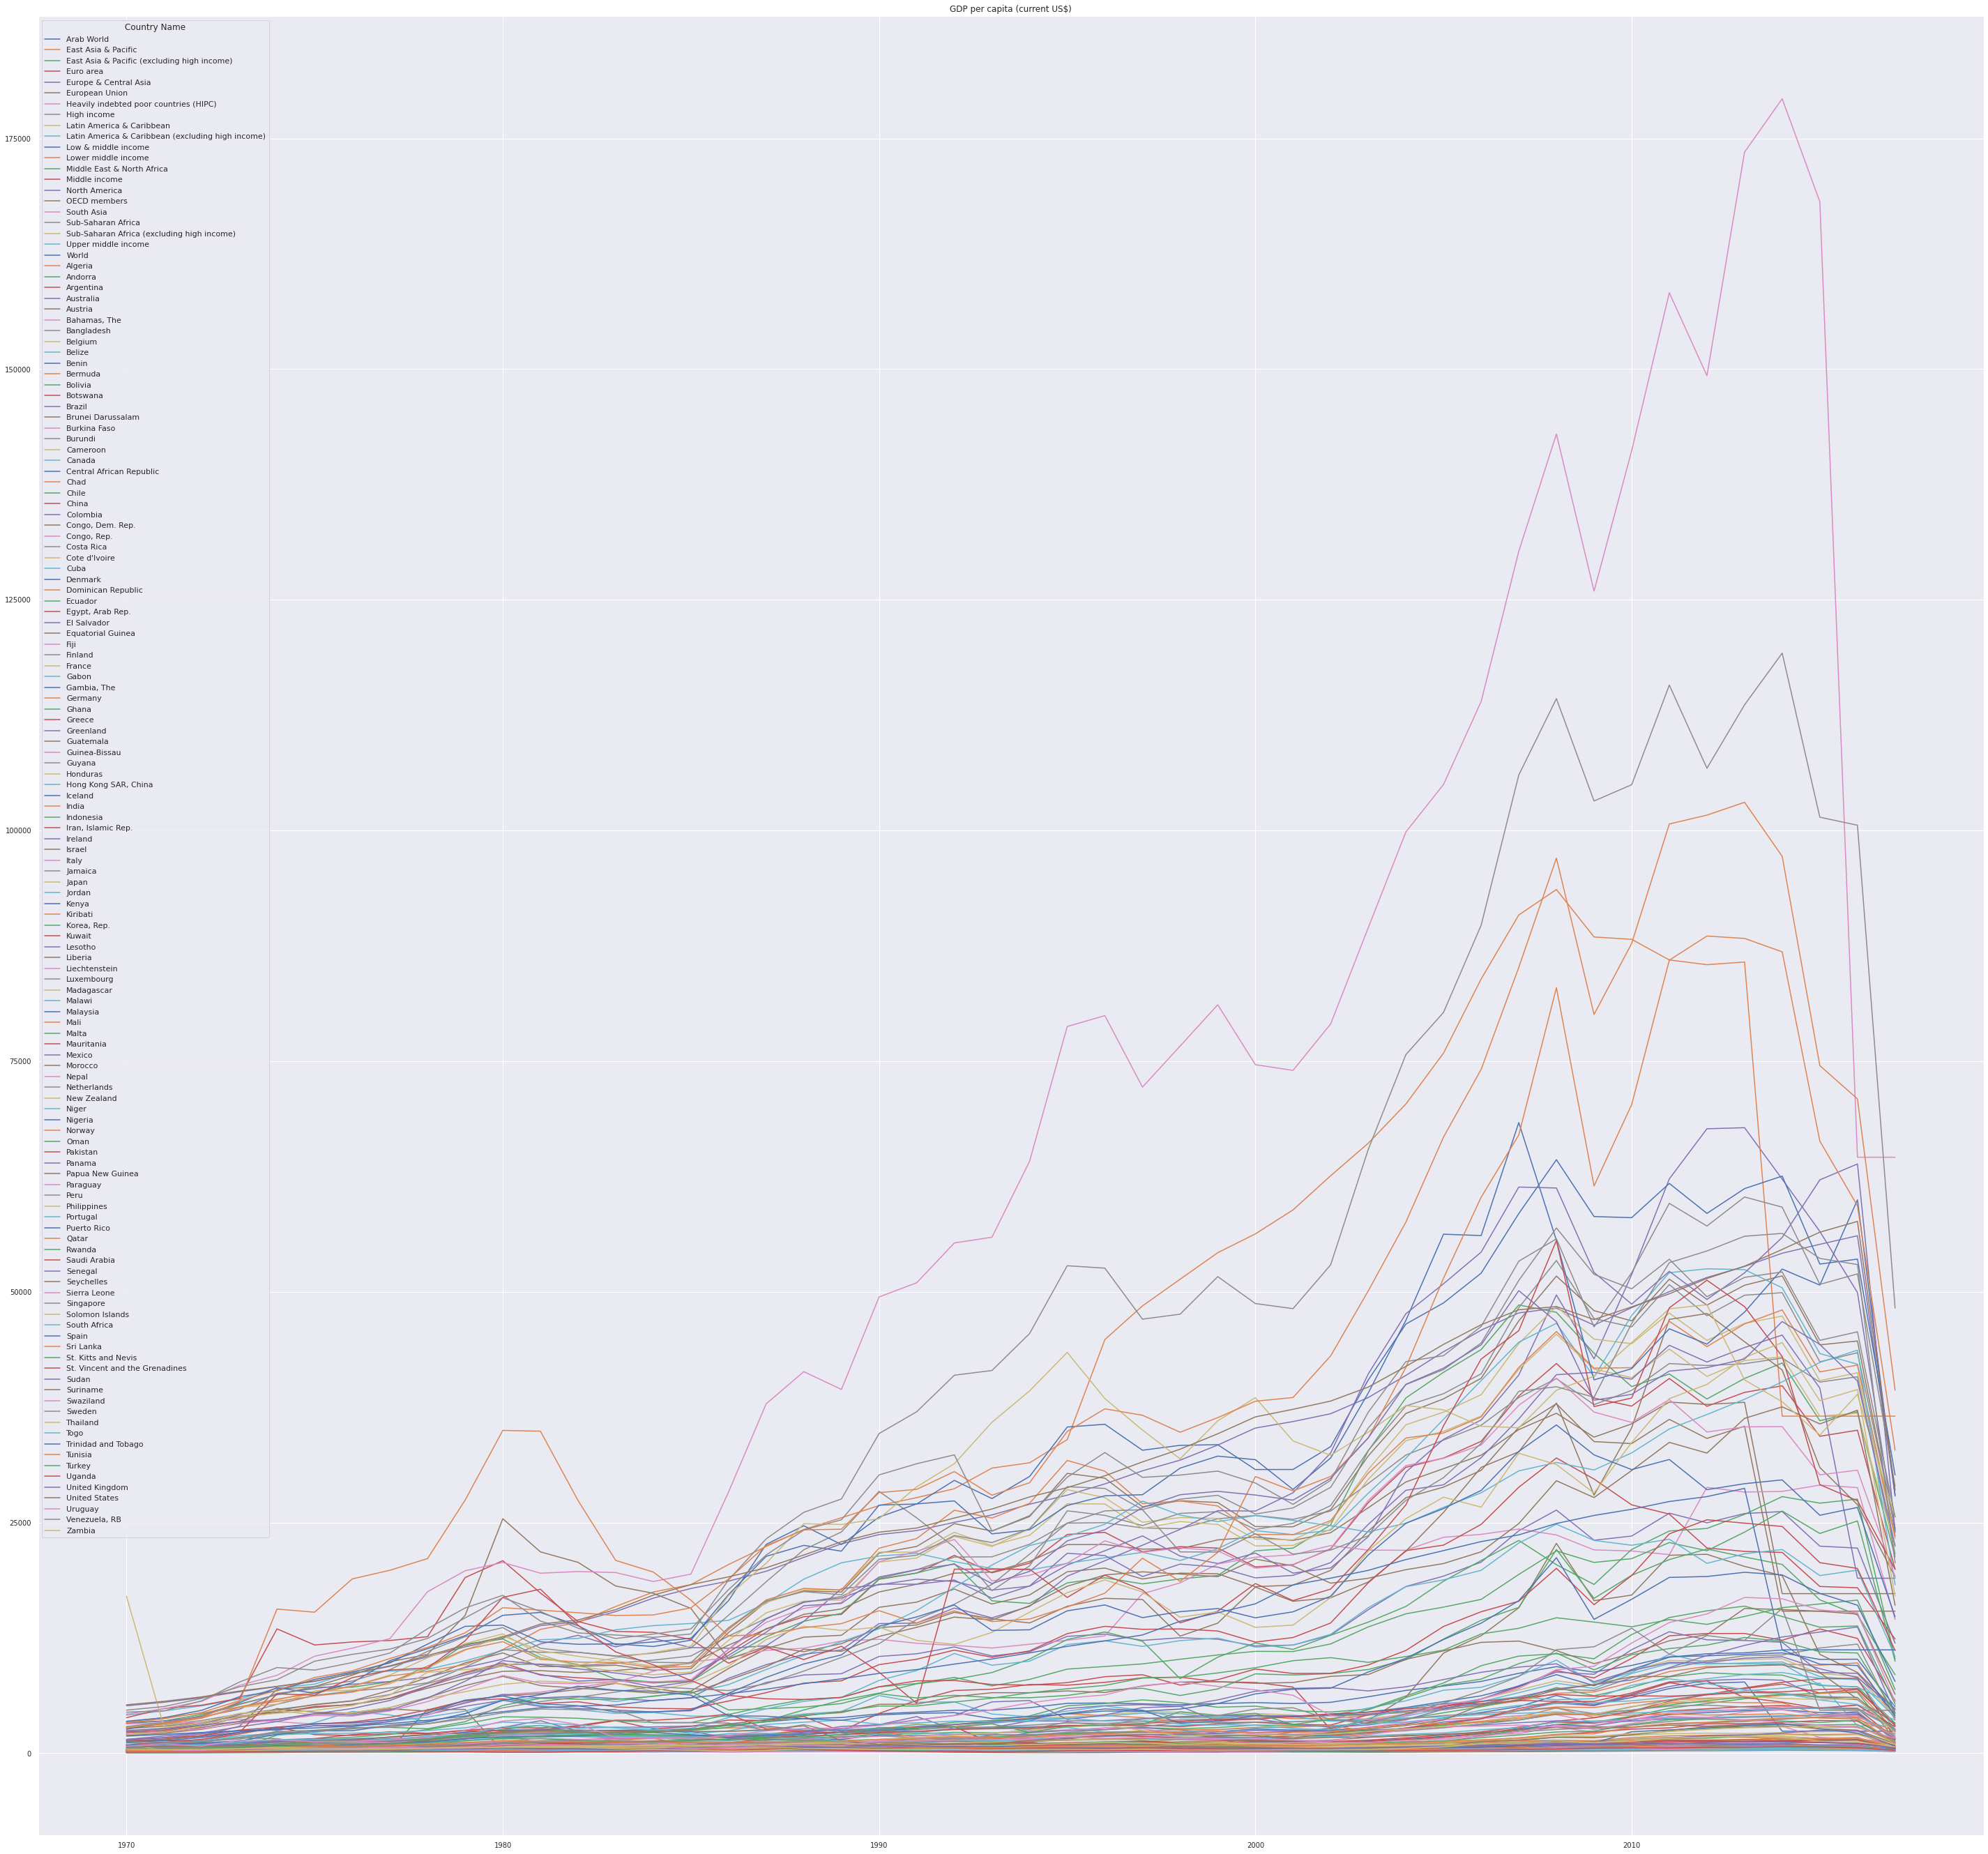

In [39]:
df1.iloc[:][:-1].T.plot.line(figsize=(50,48), fontsize=10, title=indicators[0])


In [40]:
#as number of columns are huge and mostly are NaN we need to replace NaN by 0 and take the average of each 5 year
EdStatsData_df.fillna(0)
EdStatsData_df['1971-1975']=(EdStatsData_df['1971']+EdStatsData_df['1972']+EdStatsData_df['1973']+EdStatsData_df['1974']+EdStatsData_df['1975'])/5
EdStatsData_df['1976-1980']=(EdStatsData_df['1976']+EdStatsData_df['1977']+EdStatsData_df['1978']+EdStatsData_df['1979']+EdStatsData_df['1980'])/5
EdStatsData_df['1981-1985']=(EdStatsData_df['1981']+EdStatsData_df['1982']+EdStatsData_df['1983']+EdStatsData_df['1984']+EdStatsData_df['1985'])/5
EdStatsData_df['1986-1990']=(EdStatsData_df['1986']+EdStatsData_df['1987']+EdStatsData_df['1988']+EdStatsData_df['1989']+EdStatsData_df['1990'])/5
EdStatsData_df['1991-1995']=(EdStatsData_df['1991']+EdStatsData_df['1992']+EdStatsData_df['1993']+EdStatsData_df['1994']+EdStatsData_df['1995'])/5
EdStatsData_df['1996-2000']=(EdStatsData_df['1996']+EdStatsData_df['1997']+EdStatsData_df['1998']+EdStatsData_df['1999']+EdStatsData_df['2000'])/5
EdStatsData_df['2001-2005']=(EdStatsData_df['2001']+EdStatsData_df['2002']+EdStatsData_df['2003']+EdStatsData_df['2004']+EdStatsData_df['2005'])/5
EdStatsData_df['2006-2010']=(EdStatsData_df['2006']+EdStatsData_df['2007']+EdStatsData_df['2008']+EdStatsData_df['2009']+EdStatsData_df['2010'])/5
EdStatsData_df['2011-2015']=(EdStatsData_df['2011']+EdStatsData_df['2012']+EdStatsData_df['2013']+EdStatsData_df['2014']+EdStatsData_df['2015'])/5
EdStatsData_df['2016-2020']=(EdStatsData_df['2016']+EdStatsData_df['2017']+EdStatsData_df['2020'])/3  #as EdStatsData_df['2018'] and EdStatsData_df['2019']not given


In [41]:
#creating the saperate data frame for averaged columns
EdStatsData_df1=EdStatsData_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1971-1975', '1976-1980', '1981-1985',
                               '1986-1990', '1991-1995', '1996-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020']].copy()
EdStatsData_df1.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

   1971-1975  1976-1980  1981-1985  1986-1990  1991-1995  1996-2000  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  57.145473  63.123403  67.505409  71.275095  71.511565  75.387906   

   2001-2005  2006-2010  2011-2015  2016-2020  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4  80.750772  83.877136        NaN        NaN

In [42]:
SE_PRM_TENR=EdStatsData_df1[EdStatsData_df1['Indicator Name']=='Adjusted net enrolment rate, primary, both sexes (%)'].set_index('Country Name')
SE_PRM_TENR.head(10)


Country Code  \
Country Name                                                 
Arab World                                             ARB   
East Asia & Pacific                                    EAS   
East Asia & Pacific (excluding high income)            EAP   
Euro area                                              EMU   
Europe & Central Asia                                  ECS   
Europe & Central Asia (excluding high income)          ECA   
European Union                                         EUU   
Heavily indebted poor countries (HIPC)                 HPC   
High income                                            HIC   
Latin America & Caribbean                              LCN   

                                                                                  Indicator Name  \
Country Name                                                                                       
Arab World                                     Adjusted net enrolment rate, primary, both sex...   
East Asia & Pacific                            Adjusted net enrolment rate, primary, both sex...   
East Asia & Pacific (excluding high income)    Adjusted net enrolment rate, primary, both sex...   
Euro area                                      Adjusted net enrolment rate, primary, both sex...   
Europe & Central Asia                          Adjusted net enrolment rate, primary, both sex...   
Europe & Central Asia (excluding high income)  Adjusted net enrolment rate, primary, both sex...   
European Union                                 Adjusted net enrolment rate, primary, both sex...   
Heavily indebted poor countries (HIPC)         Adjusted net enrolment rate, primary, both sex...   
High income                                    Adjusted net enrolment rate, primary, both sex...   
Latin America & Caribbean                      Adjusted net enrolment rate, primary, both sex...   

                                              Indicator Code  1971-1975  \
Country Name                                                              
Arab World                                       SE.PRM.TENR  57.145473   
East Asia & Pacific                              SE.PRM.TENR        NaN   
East Asia & Pacific (excluding high income)      SE.PRM.TENR        NaN   
Euro area                                        SE.PRM.TENR  95.560129   
Europe & Central Asia                            SE.PRM.TENR        NaN   
Europe & Central Asia (excluding high income)    SE.PRM.TENR        NaN   
European Union                                   SE.PRM.TENR  95.732872   
Heavily indebted poor countries (HIPC)           SE.PRM.TENR        NaN   
High income                                      SE.PRM.TENR  90.986676   
Latin America & Caribbean                        SE.PRM.TENR  84.666585   

                                               1976-1980  1981-1985  \
Country Name                                                          
Arab World                                     63.123403  67.505409   
East Asia & Pacific                            85.934303  87.567574   
East Asia & Pacific (excluding high income)          NaN        NaN   
Euro area                                      96.655043  96.428633   
Europe & Central Asia                          93.760828  93.494583   
Europe & Central Asia (excluding high income)        NaN        NaN   
European Union                                 96.010353  95.543678   
Heavily indebted poor countries (HIPC)         45.198502  48.993279   
High income                                    92.593329  94.356252   
Latin America & Caribbean                      87.776266  90.137515   

                                               1986-1990  1991-1995  \
Country Name                                                          
Arab World                                     71.275095  71.511565   
East Asia & Pacific                            94.845657  94.947801   
East Asia & Pacific (excluding high income)    94.365778  94.5

In [43]:
print(SE_PRM_TENR['2016-2020'].unique())  #Output:[nan]  so we can drop this columns also we don't need 'Country Code', 'Indicator Name','Indicator Code'
SE_PRM_TENR.drop(columns=['2016-2020','Country Code', 'Indicator Name','Indicator Code'], axis=1, inplace=True)
SE_PRM_TENR.head(10)

[nan]


1971-1975  1976-1980  \
Country Name                                                          
Arab World                                     57.145473  63.123403   
East Asia & Pacific                                  NaN  85.934303   
East Asia & Pacific (excluding high income)          NaN        NaN   
Euro area                                      95.560129  96.655043   
Europe & Central Asia                                NaN  93.760828   
Europe & Central Asia (excluding high income)        NaN        NaN   
European Union                                 95.732872  96.010353   
Heavily indebted poor countries (HIPC)               NaN  45.198502   
High income                                    90.986676  92.593329   
Latin America & Caribbean                      84.666585  87.776266   

                                               1981-1985  1986-1990  \
Country Name                                                          
Arab World                                     67.505409  71.275095   
East Asia & Pacific                            87.567574  94.845657   
East Asia & Pacific (excluding high income)          NaN  94.365778   
Euro area                                      96.428633  97.051517   
Europe & Central Asia                          93.494583  94.756189   
Europe & Central Asia (excluding high income)        NaN        NaN   
European Union                                 95.543678  95.702220   
Heavily indebted poor countries (HIPC)         48.993279  47.539848   
High income                                    94.356252  95.320589   
Latin America & Caribbean                      90.137515  90.320987   

                                               1991-1995  1996-2000  \
Country Name                                                          
Arab World                                     71.511565  75.387906   
East Asia & Pacific                            94.947801  93.289391   
East Asia & Pacific (excluding high income)    94.586139  92.888321   
Euro area                                      96.681514  98.721939   
Europe & Central Asia                          94.862242  95.713748   
Europe & Central Asia (excluding high income)        NaN  92.829219   
European Union                                 95.359361  97.946851   
Heavily indebted poor countries (HIPC)         46.973075  51.801984   
High income                                    95.222101  96.486566   
Latin America & Caribbean                      91.391972  93.757684   

                                               2001-2005  2006-2010  2011-2015  
Country Name                                                                    
Arab World                                     80.750772  83.877136        NaN  
East Asia & Pacific                            96.407341  95.669913        NaN  
East Asia & Pacific (excluding high income)    96.218976  95.384146        NaN  
Euro area                                      99.026881  99.027516        NaN  
Europe & Central Asia                          97.498877  97.016290        NaN  
Europe & Central Asia (excluding high income)  96.098752  95.019086        NaN  
European Union                                 98.479607  98.436804        NaN  
Heavily indebted poor countries (HIPC)         62.796265  74.310928        NaN  
High income                                    96.520540  97.083804  96.858417  
Latin America & Caribbean                      95.576759  95.041696        NaN

In [44]:
#Droping all those rows which has more than 5 NaNs'
for index in list(SE_PRM_TENR.index.values):
  na_count=SE_PRM_TENR.loc[[index]].isna().sum().sum()
  if na_count>5:
    SE_PRM_TENR.drop([index], axis=0, inplace=True)

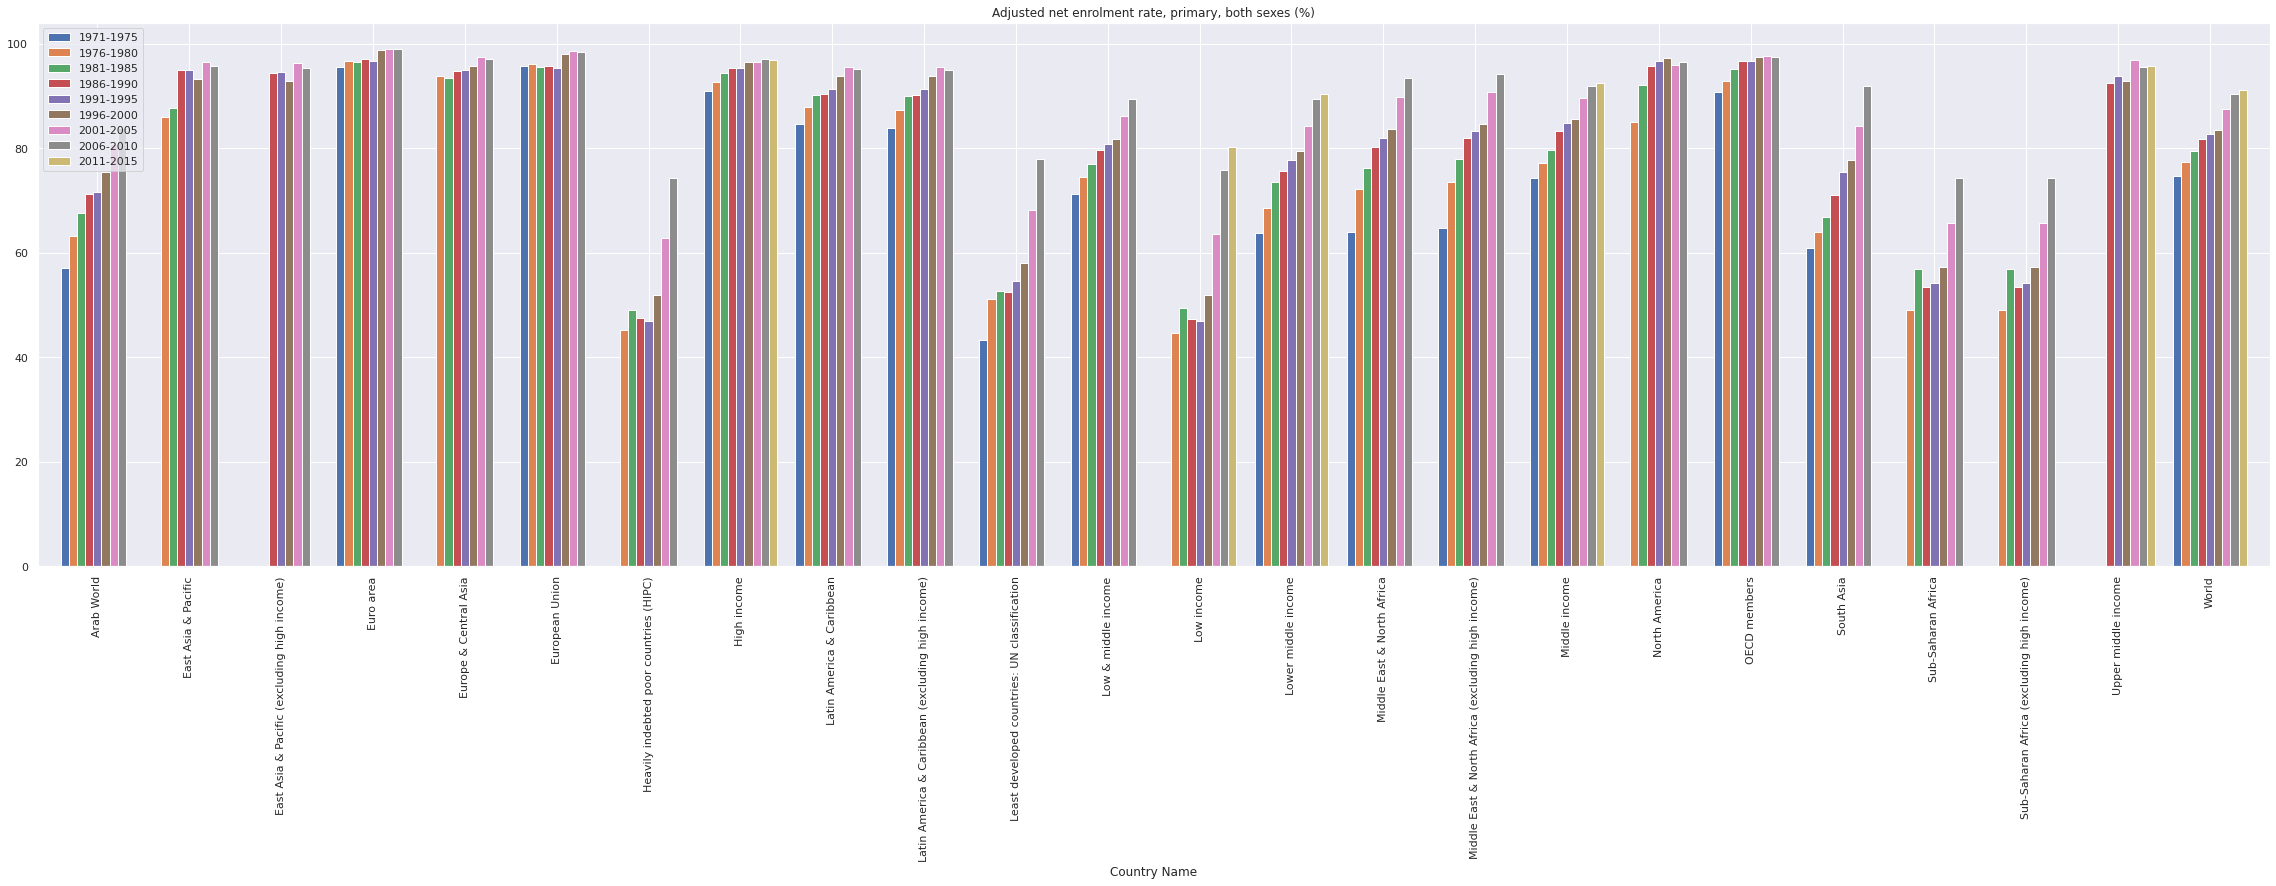

In [45]:
SE_PRM_TENR.plot.bar(figsize=(40, 10), title='Adjusted net enrolment rate, primary, both sexes (%)',width=0.8)

Con:Almost all the countries has increased their "Adjusted net enrolment rate, primary, both sexes (%)" index 

In [46]:
EdStatsData_df1.loc[5][2]

'Adjusted net enrolment rate, primary, female (%)'

In [47]:
SE_PRM_TENR_FE=EdStatsData_df1[EdStatsData_df1['Indicator Name']=='Adjusted net enrolment rate, primary, female (%)'].set_index('Country Name')
SE_PRM_TENR_FE.head(2)

Country Code  \
Country Name                       
Arab World                   ARB   
East Asia & Pacific          EAS   

                                                       Indicator Name  \
Country Name                                                            
Arab World           Adjusted net enrolment rate, primary, female (%)   
East Asia & Pacific  Adjusted net enrolment rate, primary, female (%)   

                     Indicator Code  1971-1975  1976-1980  1981-1985  \
Country Name                                                           
Arab World           SE.PRM.TENR.FE  45.723592   52.95499  59.419798   
East Asia & Pacific  SE.PRM.TENR.FE        NaN        NaN        NaN   

                     1986-1990  1991-1995  1996-2000  2001-2005  2006-2010  \
Country Name                                                                 
Arab World           64.581438  65.364834  70.761229   77.47775  81.246378   
East Asia & Pacific  92.218263  93.118047  92.745158   96.28132  95.504280   

                     2011-2015  2016-2020  
Country Name                               
Arab World                 NaN        NaN  
East Asia & Pacific        NaN        NaN

In [48]:
print(SE_PRM_TENR_FE['2016-2020'].unique())  #Output:[nan]  so we can drop this columns also we don't need 'Country Code', 'Indicator Name','Indicator Code'
SE_PRM_TENR_FE.drop(columns=['2016-2020','Country Code', 'Indicator Name','Indicator Code'], axis=1, inplace=True)
SE_PRM_TENR_FE.head(2)

[nan]


1971-1975  1976-1980  1981-1985  1986-1990  1991-1995  \
Country Name                                                                 
Arab World           45.723592   52.95499  59.419798  64.581438  65.364834   
East Asia & Pacific        NaN        NaN        NaN  92.218263  93.118047   

                     1996-2000  2001-2005  2006-2010  2011-2015  
Country Name                                                     
Arab World           70.761229   77.47775  81.246378        NaN  
East Asia & Pacific  92.745158   96.28132  95.504280        NaN

In [49]:
#Droping all those rows which has more than 5 NaNs'
for index in list(SE_PRM_TENR_FE.index.values):
  na_count=SE_PRM_TENR_FE.loc[[index]].isna().sum().sum()
  if na_count>5:
    SE_PRM_TENR_FE.drop([index], axis=0, inplace=True)
SE_PRM_TENR_FE.head(2)

1971-1975  1976-1980  1981-1985  1986-1990  1991-1995  \
Country Name                                                                 
Arab World           45.723592   52.95499  59.419798  64.581438  65.364834   
East Asia & Pacific        NaN        NaN        NaN  92.218263  93.118047   

                     1996-2000  2001-2005  2006-2010  2011-2015  
Country Name                                                     
Arab World           70.761229   77.47775  81.246378        NaN  
East Asia & Pacific  92.745158   96.28132  95.504280        NaN

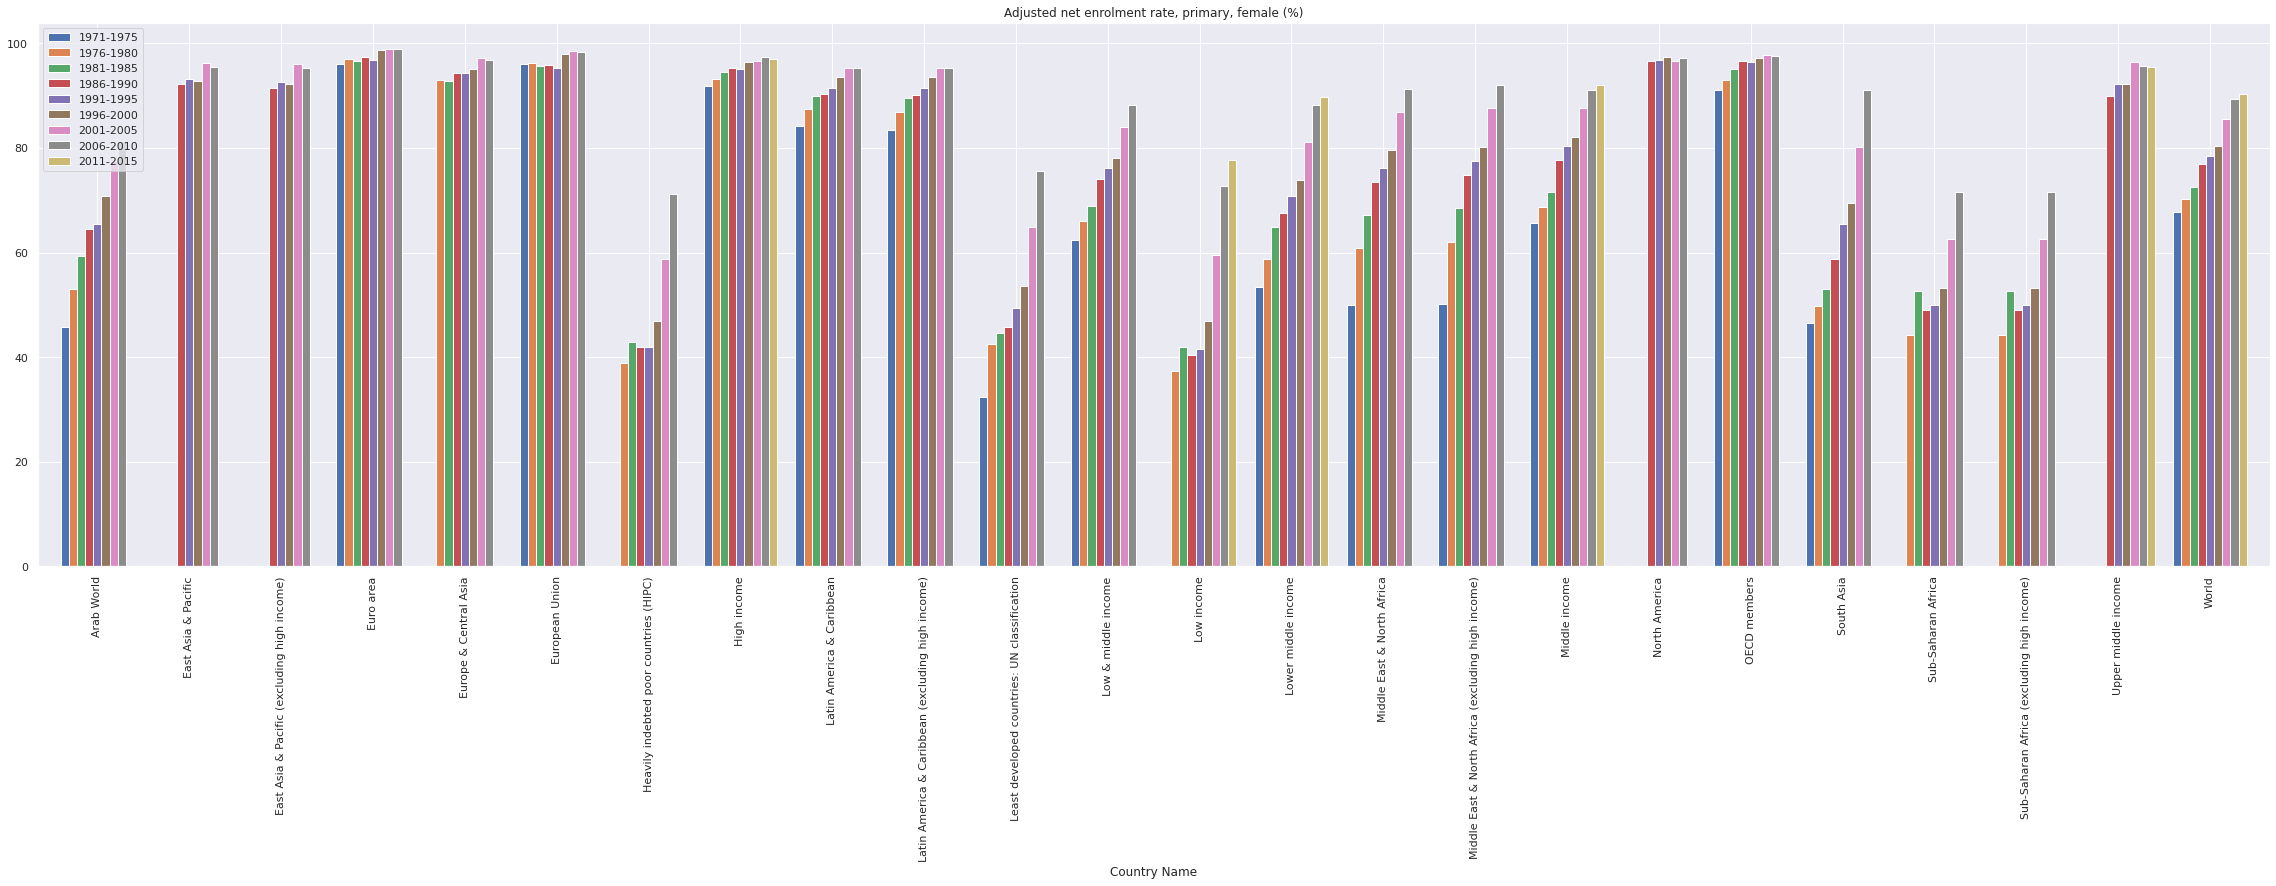

In [50]:
ax=SE_PRM_TENR_FE.plot.bar(figsize=(40, 10), title='Adjusted net enrolment rate, primary, female (%)',width=0.8)

In [51]:
#Adjusted net enrolment rate, primary, male (%)   SE_PRM_TENR_MA

[nan]


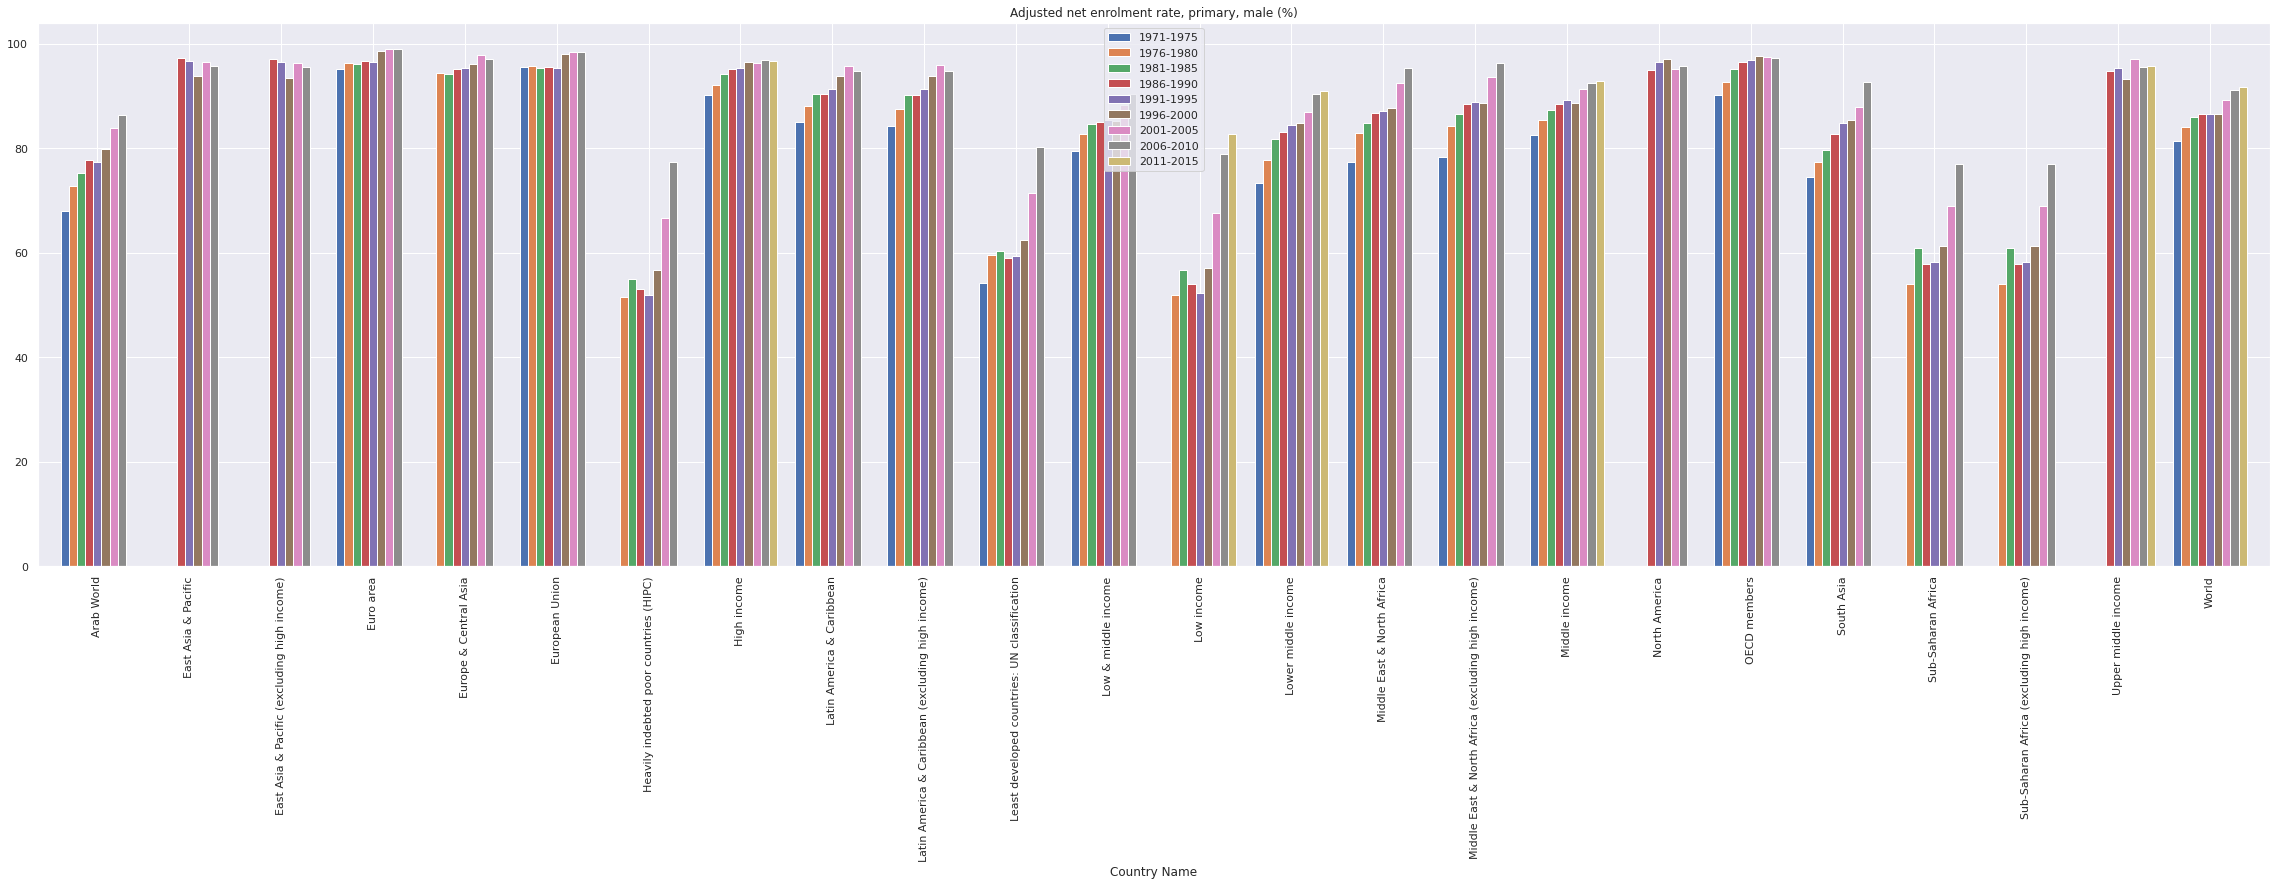

In [52]:
SE_PRM_TENR_MA=EdStatsData_df1[EdStatsData_df1['Indicator Name']=='Adjusted net enrolment rate, primary, male (%)'].set_index('Country Name')
print(SE_PRM_TENR_MA['2016-2020'].unique())  #Output:[nan]  so we can drop this columns also we don't need 'Country Code', 'Indicator Name','Indicator Code'
SE_PRM_TENR_MA.drop(columns=['2016-2020','Country Code', 'Indicator Name','Indicator Code'], axis=1, inplace=True)
#Droping all those rows which has more than 5 NaNs'
for index in list(SE_PRM_TENR_MA.index.values):
  na_count=SE_PRM_TENR_MA.loc[[index]].isna().sum().sum()
  if na_count>5:
    SE_PRM_TENR_MA.drop([index], axis=0, inplace=True)

ax=SE_PRM_TENR_MA.plot.bar(figsize=(40, 10), title='Adjusted net enrolment rate, primary, male (%)',width=0.8)

At this point I realised that if I took 100th of of all indicators it will take very long to describe all, so lets comapre India, China, USA and Japan over few indicators excluding above explained.

In [53]:
India_df=EdStatsData_df1[(EdStatsData_df1['Country Name']=='India')]
China_df=EdStatsData_df1[(EdStatsData_df1['Country Name']=='China')]
Japan_df=EdStatsData_df1[(EdStatsData_df1['Country Name']=='Japan')]
USA_df=EdStatsData_df1[(EdStatsData_df1['Country Name']=='United States')]
Germany_df=EdStatsData_df1[(EdStatsData_df1['Country Name']=='Germany')]

selected_countries_df=pd.concat([India_df, China_df, Japan_df, USA_df, Germany_df])
selected_countries_df
selected_countries_df['2016-2020'].unique() #Output:[nan]  so we can drop this columns
selected_countries_df.drop(['2016-2020'], axis=1, inplace=True)
#Droping all those rows which has more than 1 NaNs'
for index in list(selected_countries_df.index.values):
  na_count=selected_countries_df.loc[[index]].isna().sum().sum()
  if na_count>=1:
    selected_countries_df.drop([index], axis=0, inplace=True)

In [54]:
indicators=['GDP per capita (current US$)', 'Population, total', 'Mortality rate, under-5 (per 1,000)', 'Population growth (annual %)', 
            'Population of the official age for lower secondary education, both sexes (number)', 'Population of the official age for lower secondary education, female (number)',
            'Population of the official age for lower secondary education, male (number)','Population of the official age for primary education, both sexes (number)',
            'Population of the official age for primary education, female (number)','opulation of the official age for primary education, male (number)',
            'Population of the official age for secondary education, both sexes (number)','Population of the official age for secondary education, female (number)',
            'Population of the official age for secondary education, male (number)','Population of the official age for tertiary education, both sexes (number)',
            'Population of the official age for tertiary education, female (number)','Population of the official age for tertiary education, male (number)']

S_No.1;  indicator Name GDP at market prices (constant 2005 US$).
S_No.2;  indicator Name GDP at market prices (current US$).
S_No.3;  indicator Name GDP per capita (constant 2005 US$).
S_No.4;  indicator Name GDP per capita (current US$).
S_No.5;  indicator Name GNI (current US$).
S_No.6;  indicator Name GNI per capita, Atlas method (current US$).
S_No.7;  indicator Name Mortality rate, under-5 (per 1,000).
S_No.8;  indicator Name Population growth (annual %).
S_No.9;  indicator Name Population of the official age for lower secondary education, both sexes (number).
S_No.10;  indicator Name Population of the official age for lower secondary education, female (number).
S_No.11;  indicator Name Population of the official age for lower secondary education, male (number).
S_No.12;  indicator Name Population of the official age for pre-primary education, both sexes (number).
S_No.13;  indicator Name Population of the official age for pre-primary education, female (number).
S_No.14;  indicat

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


S_No.24;  indicator Name Population of the official age for the last grade of primary education, both sexes (number).
S_No.25;  indicator Name Population of the official age for the last grade of primary education, female (number).
S_No.26;  indicator Name Population of the official age for the last grade of primary education, male (number).
S_No.27;  indicator Name Population of the official age for upper secondary education, both sexes (number).
S_No.28;  indicator Name Population of the official age for upper secondary education, female (number).
S_No.29;  indicator Name Population of the official age for upper secondary education, male (number).
S_No.30;  indicator Name Population of the official entrance age to primary education, both sexes (number).
S_No.31;  indicator Name Population of the official entrance age to primary education, female (number).
S_No.32;  indicator Name Population of the official entrance age to primary education, male (number).
S_No.33;  indicator Name Pop

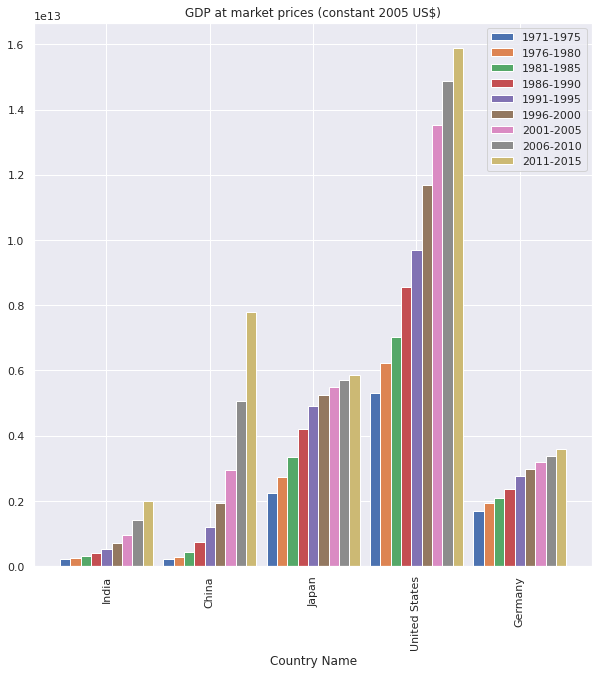

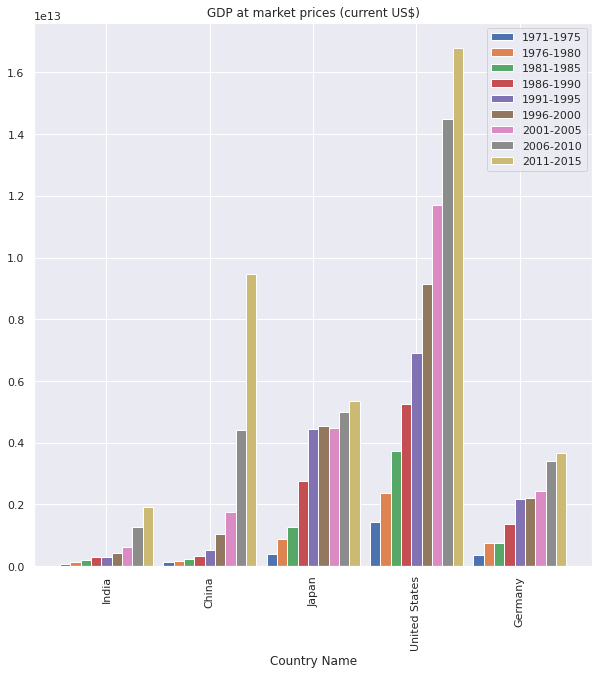

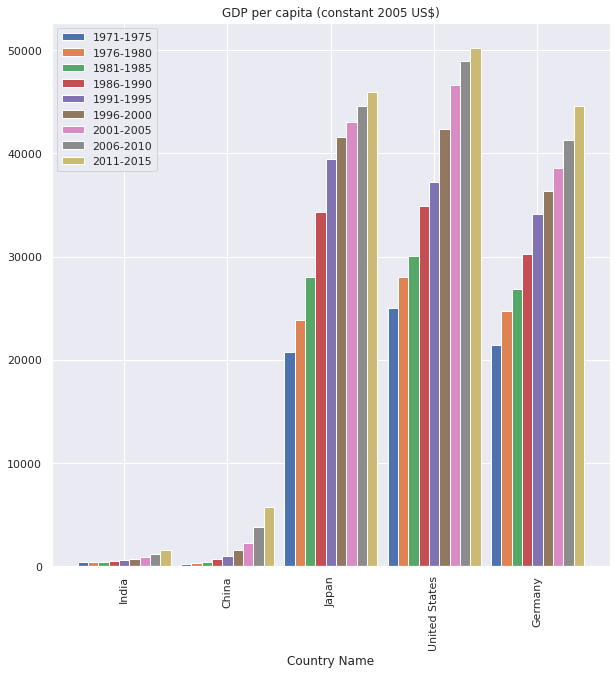

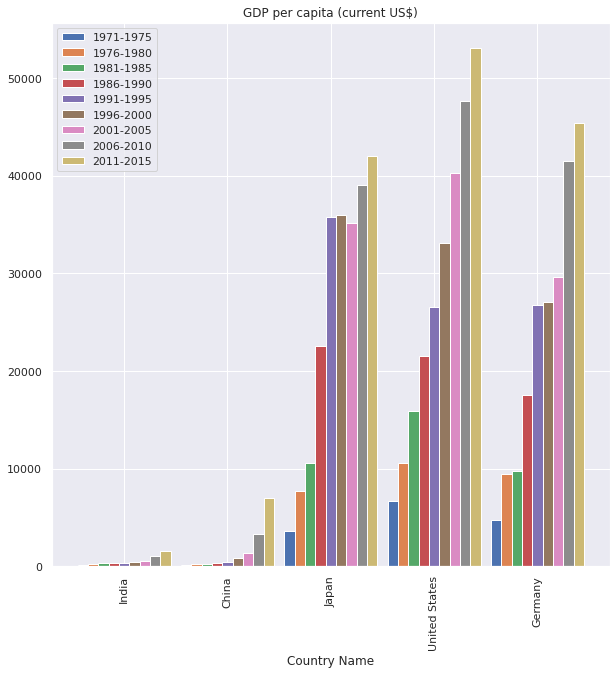

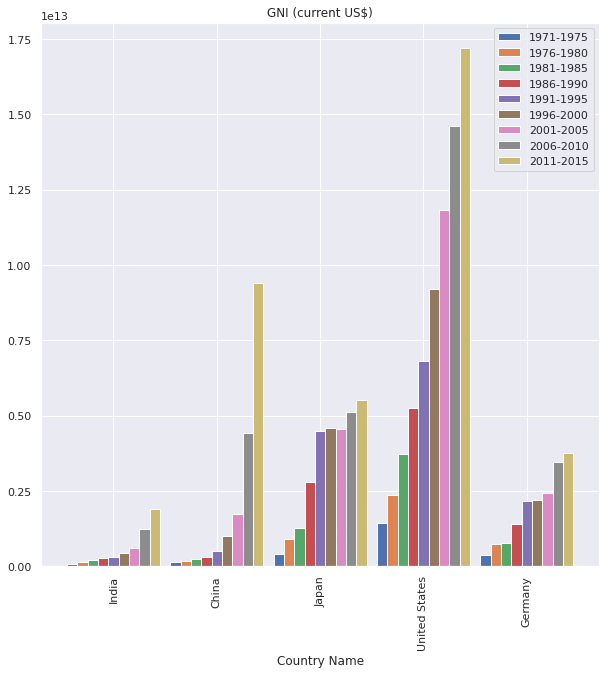

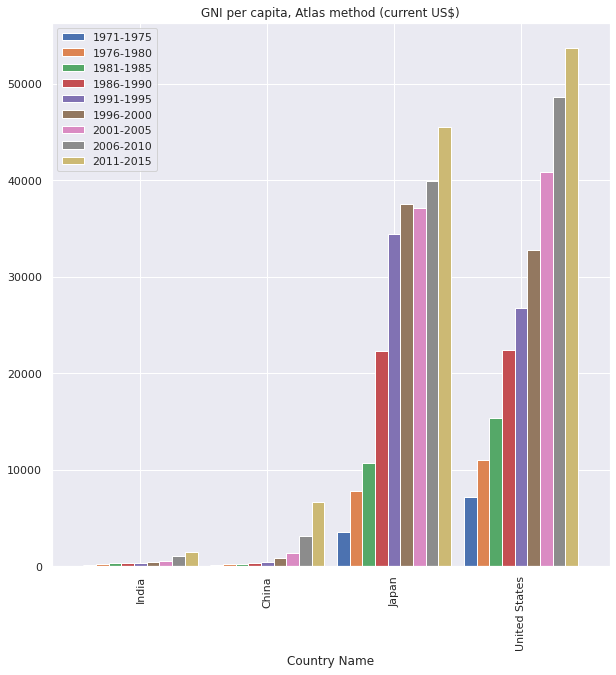

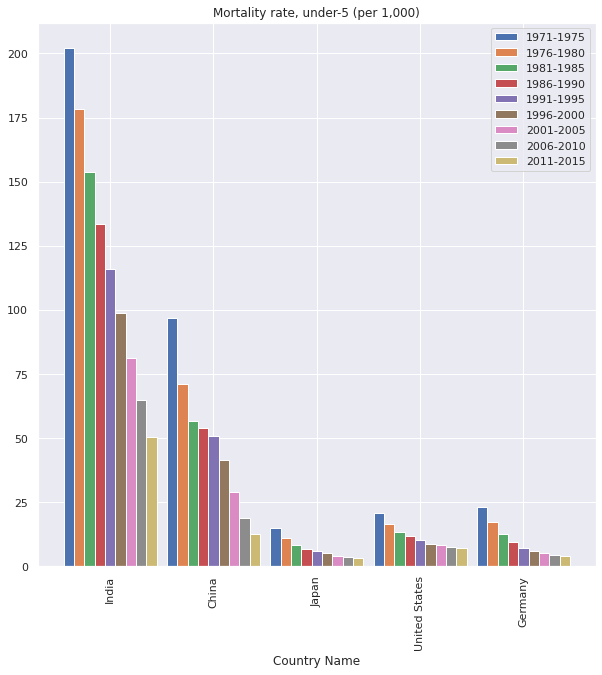

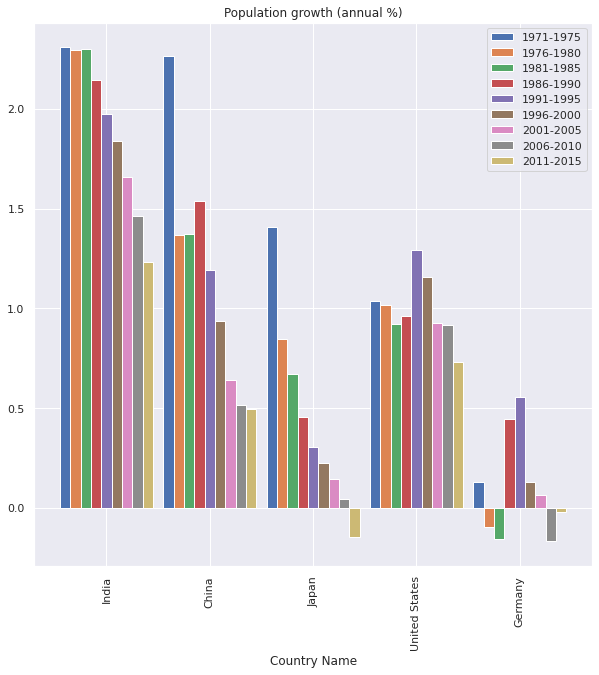

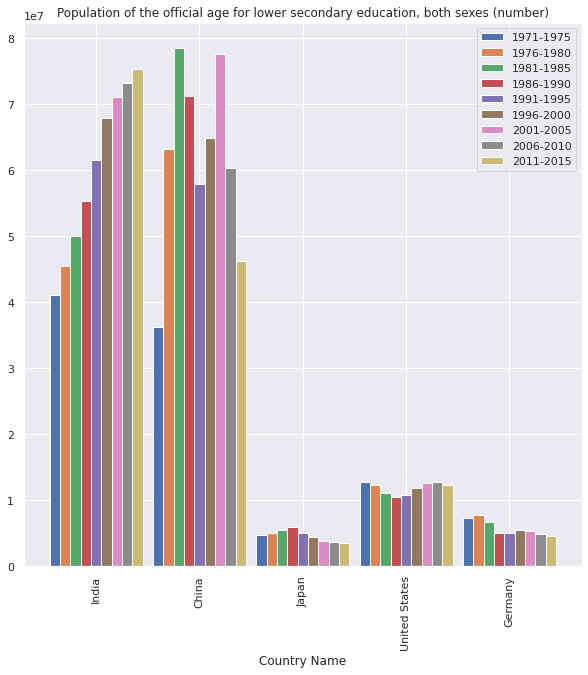

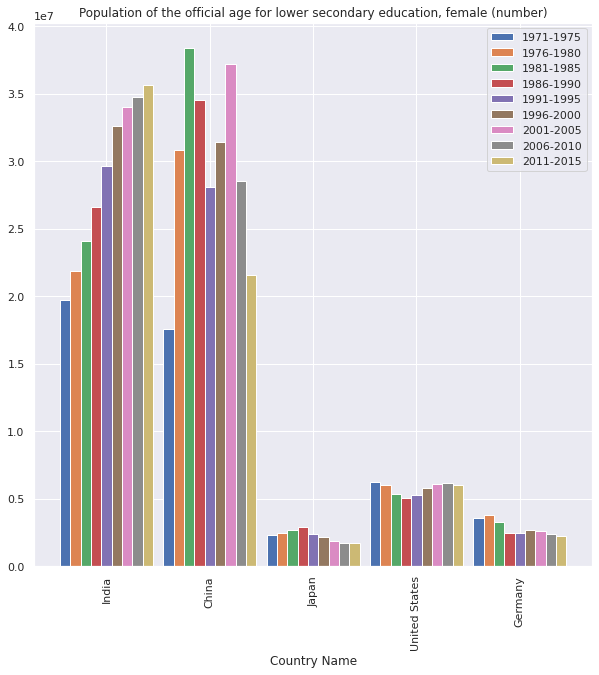

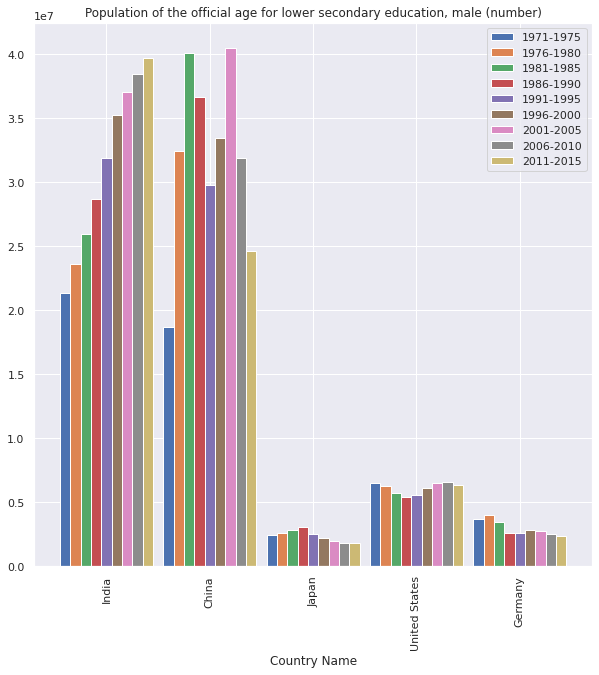

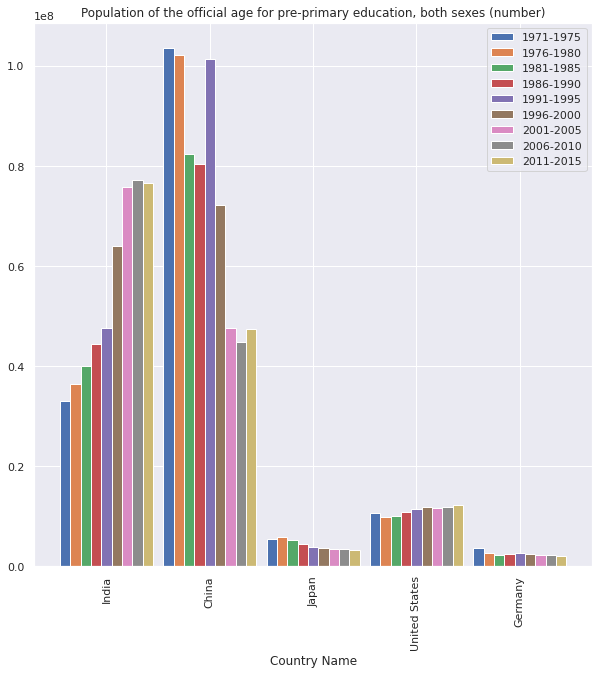

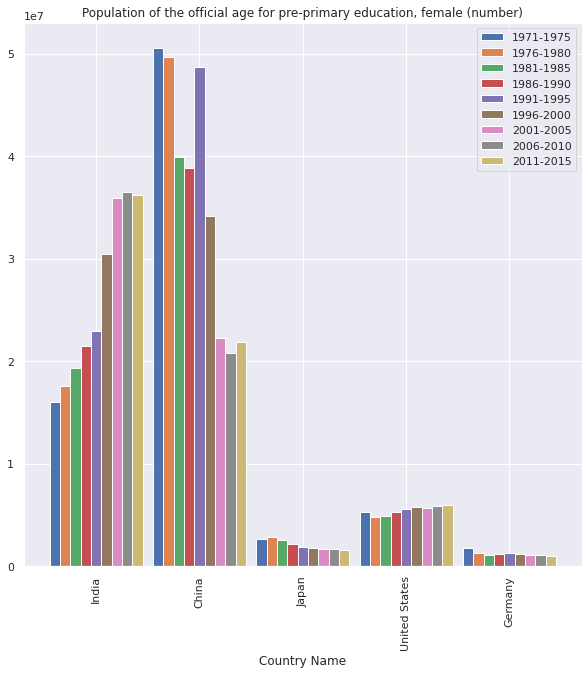

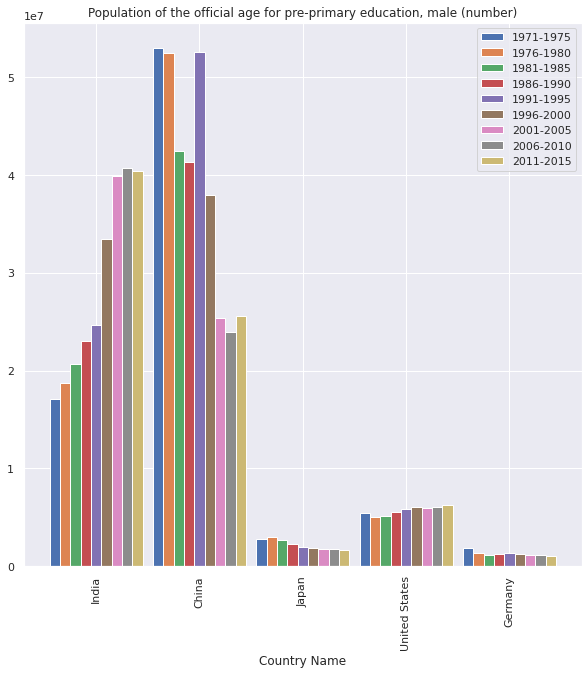

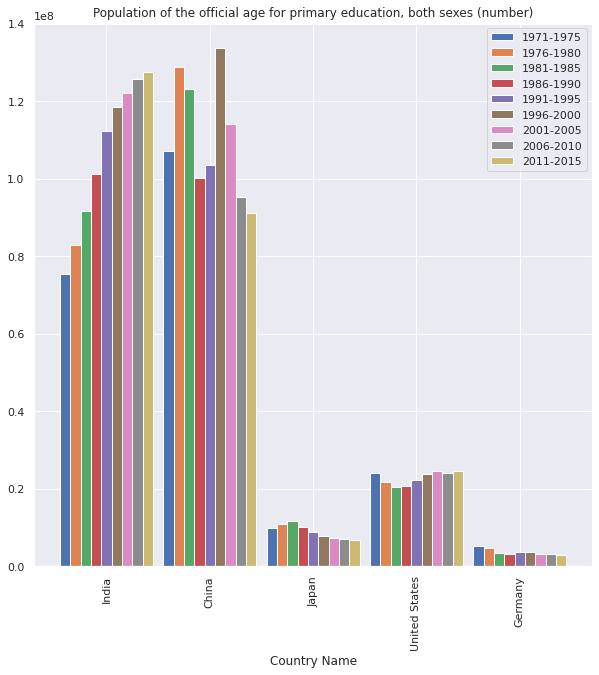

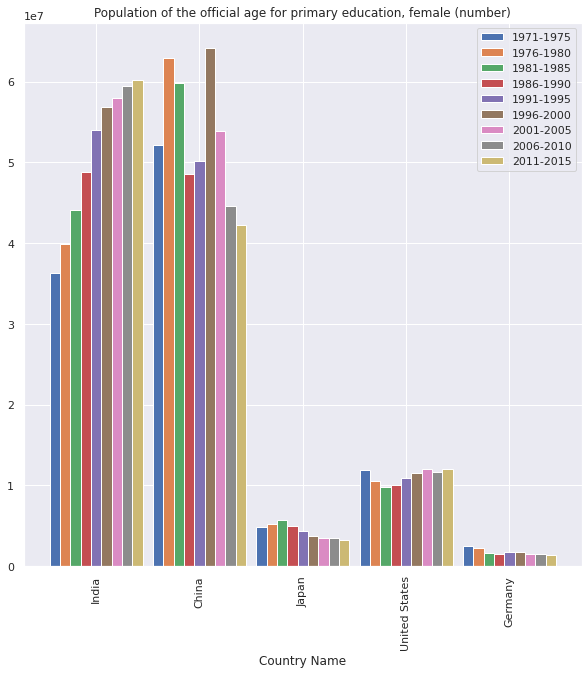

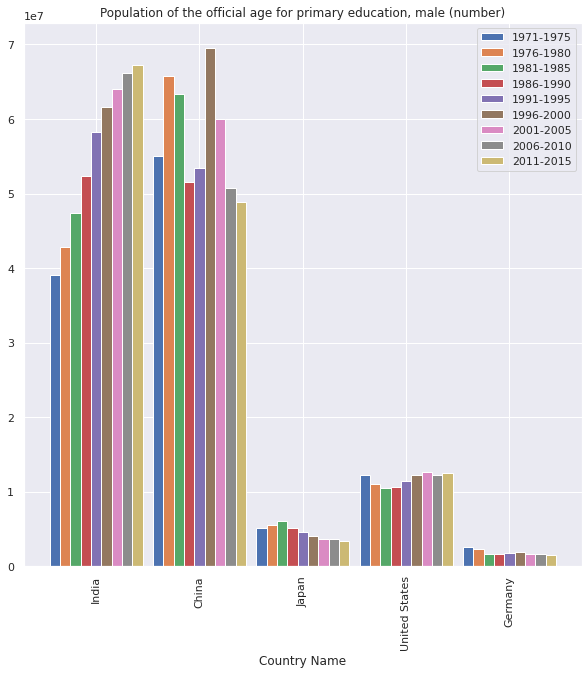

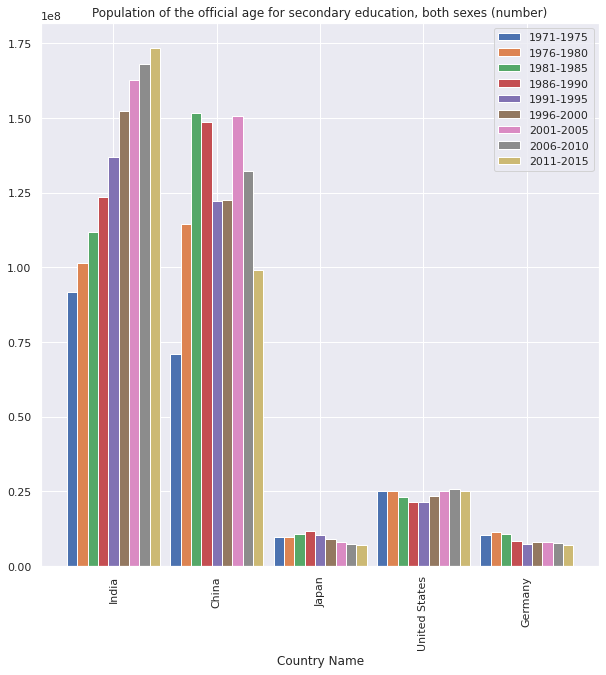

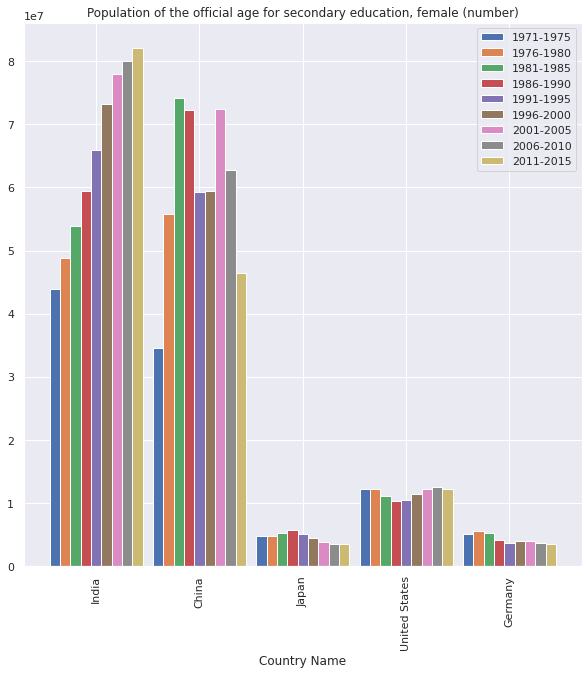

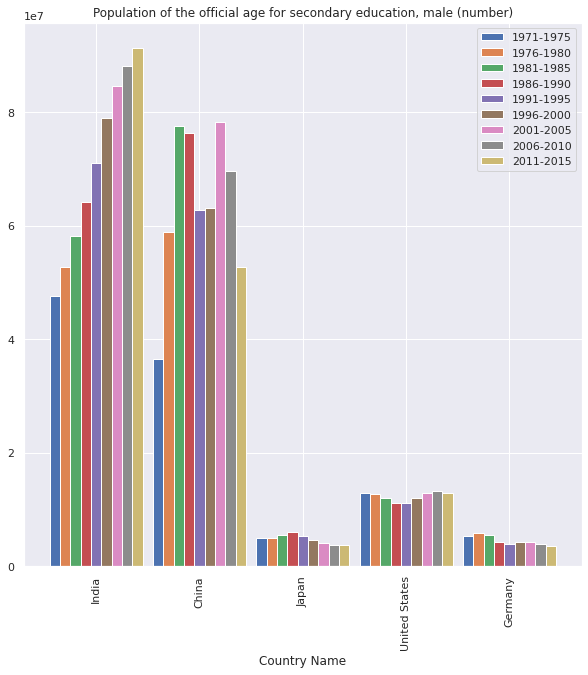

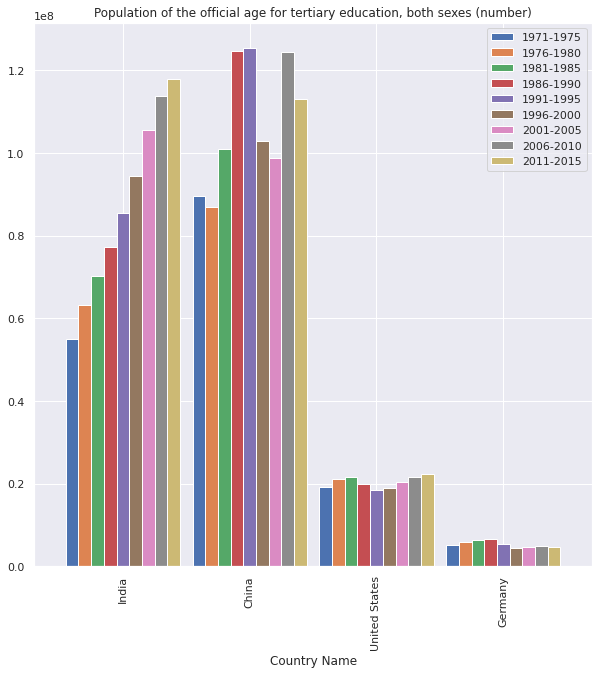

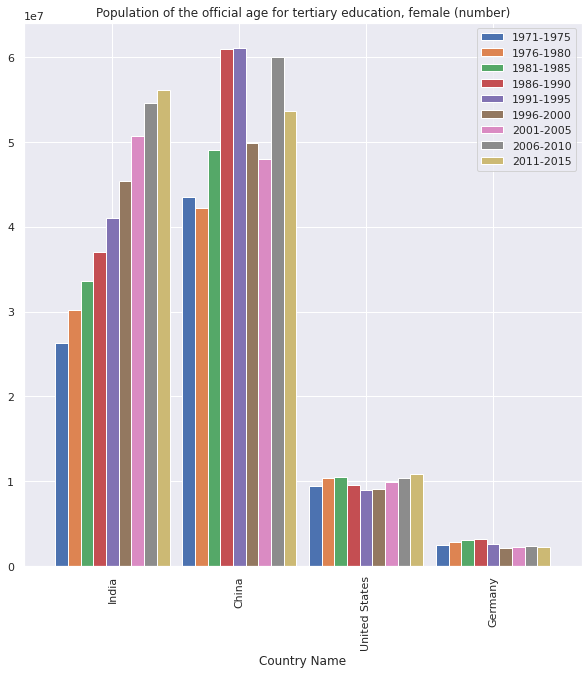

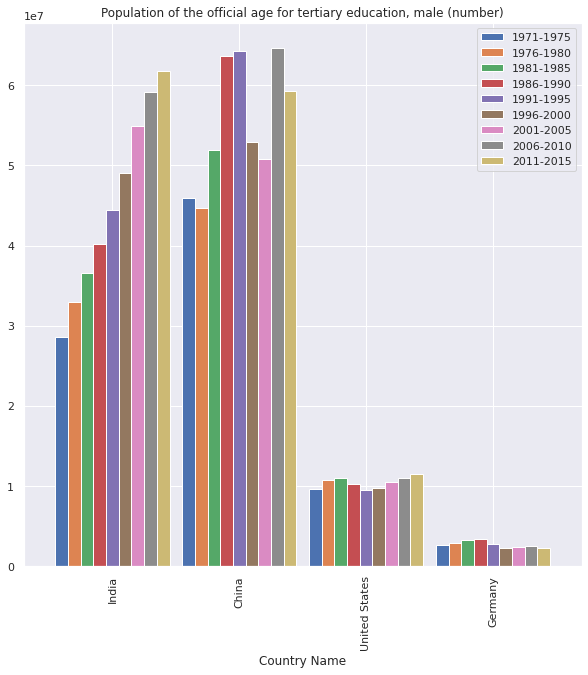

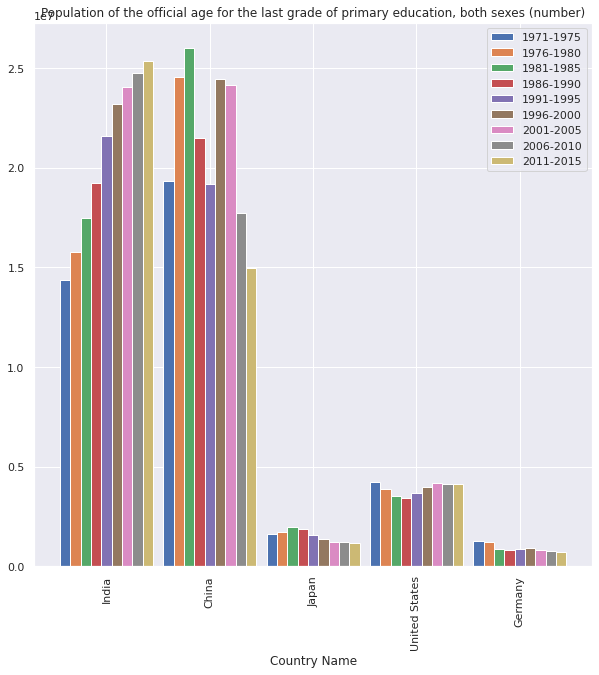

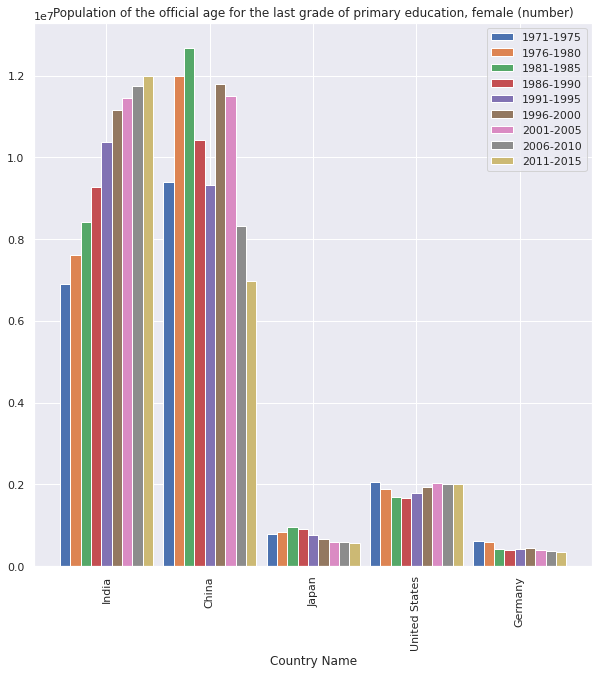

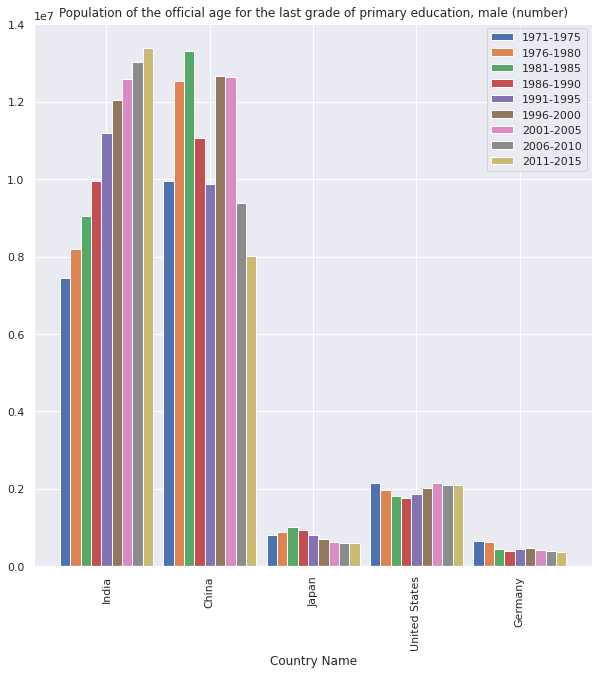

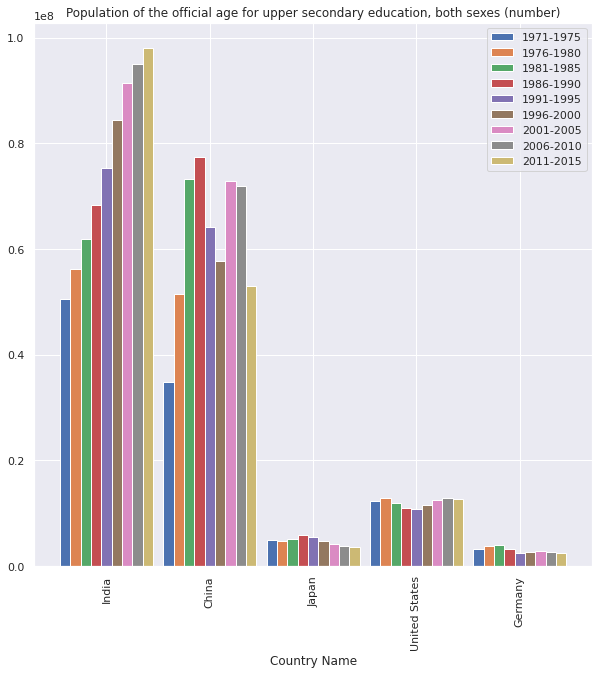

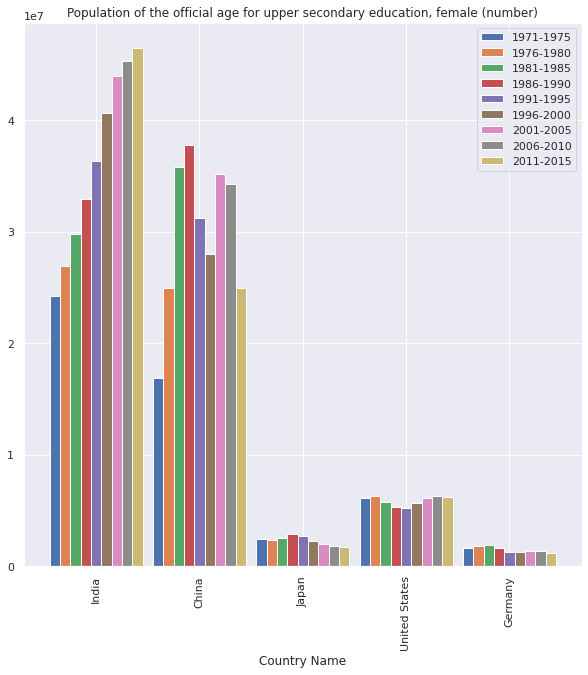

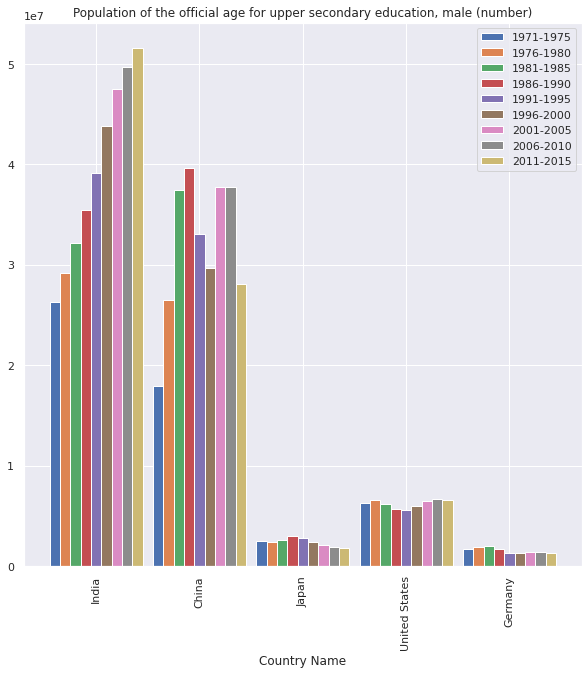

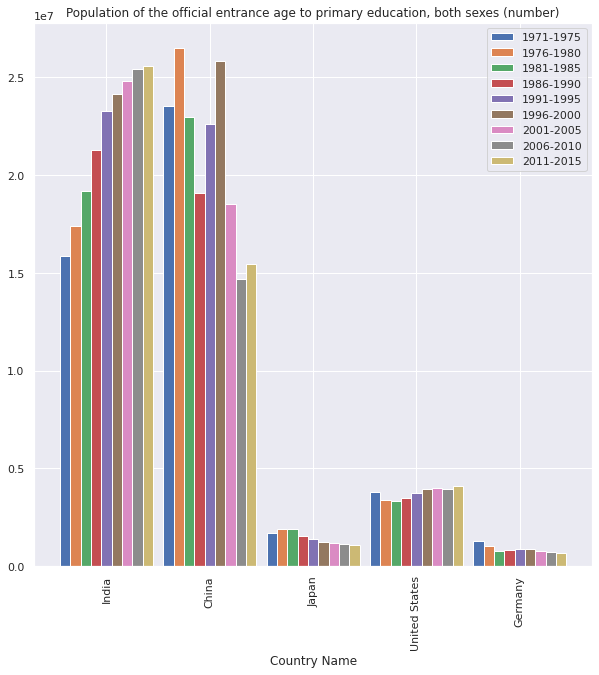

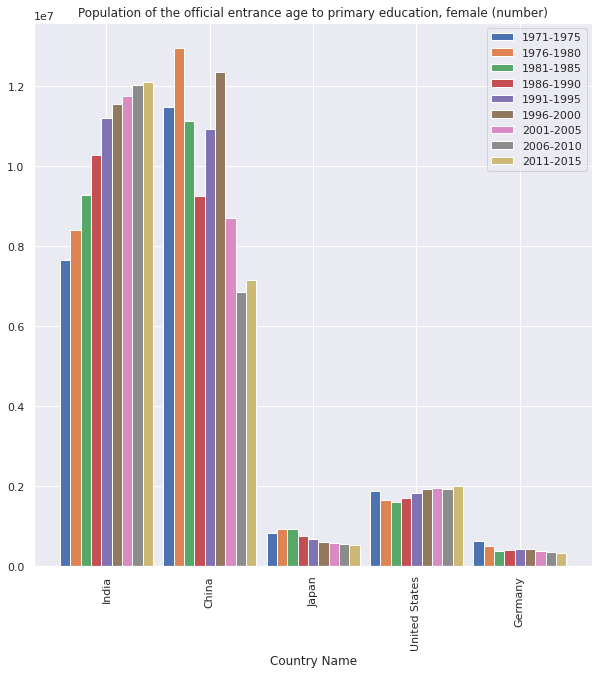

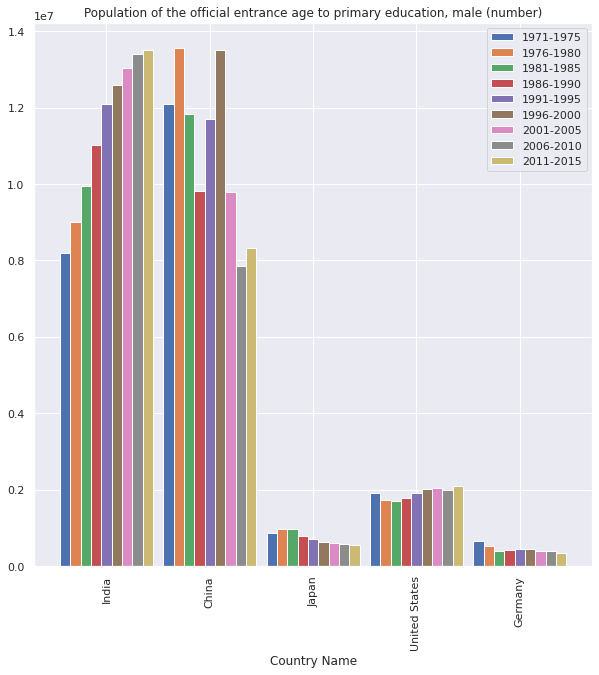

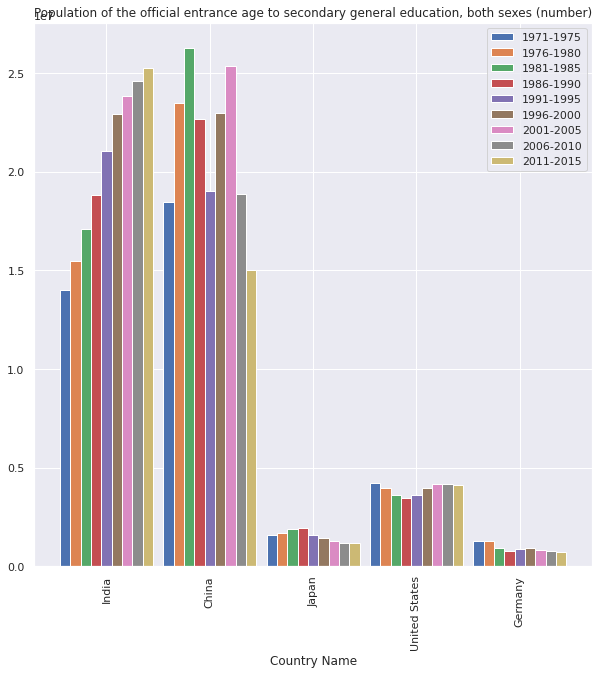

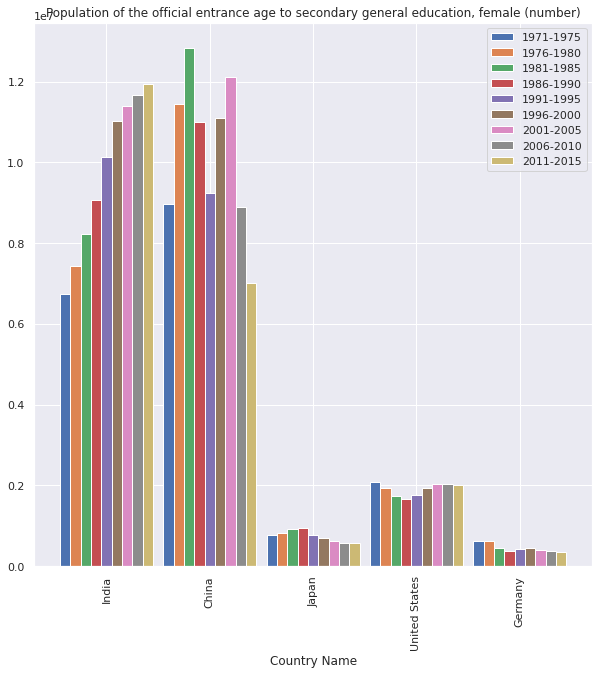

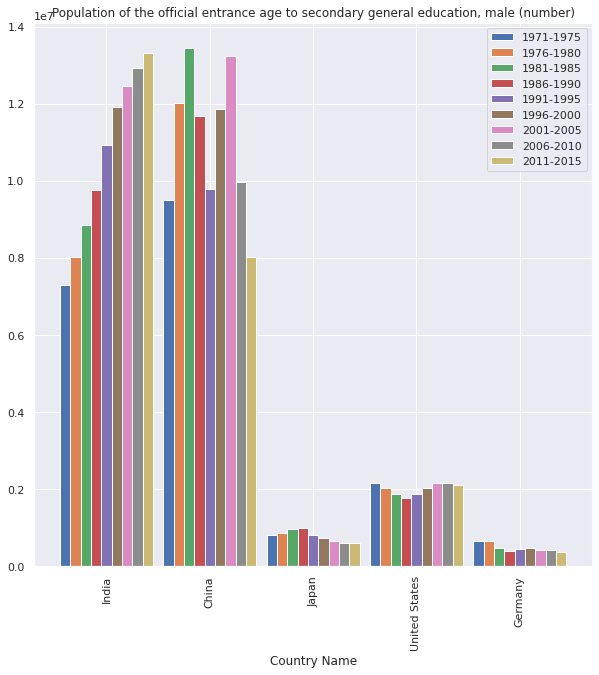

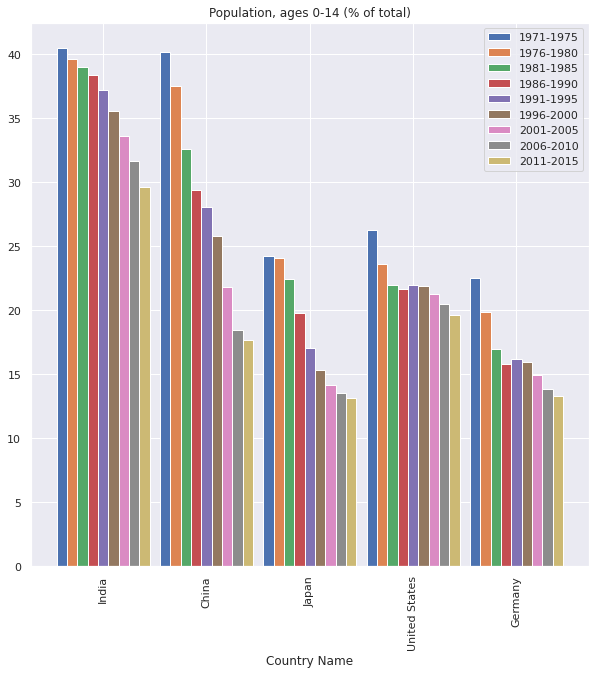

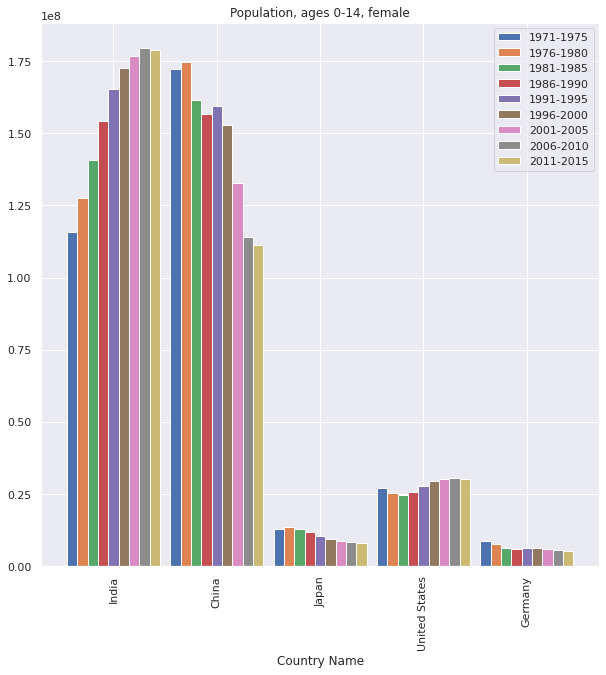

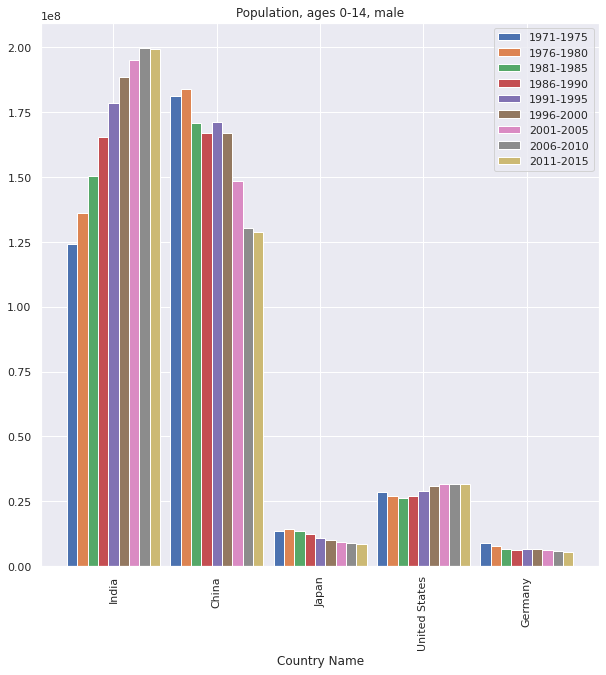

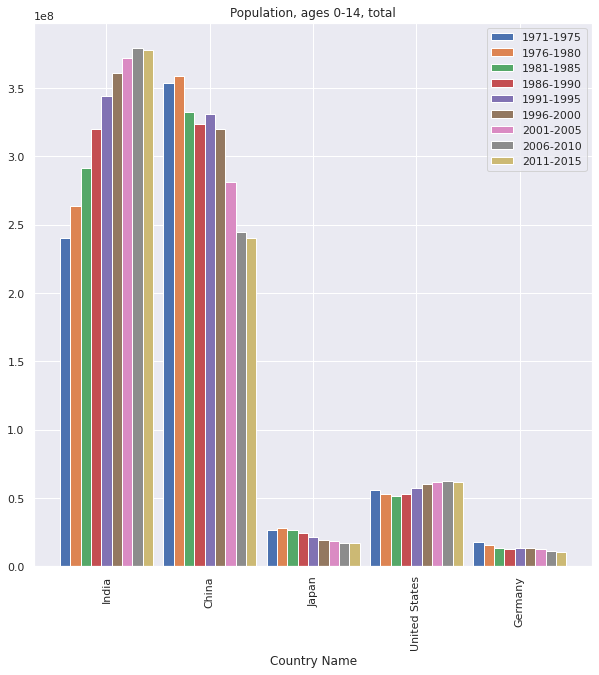

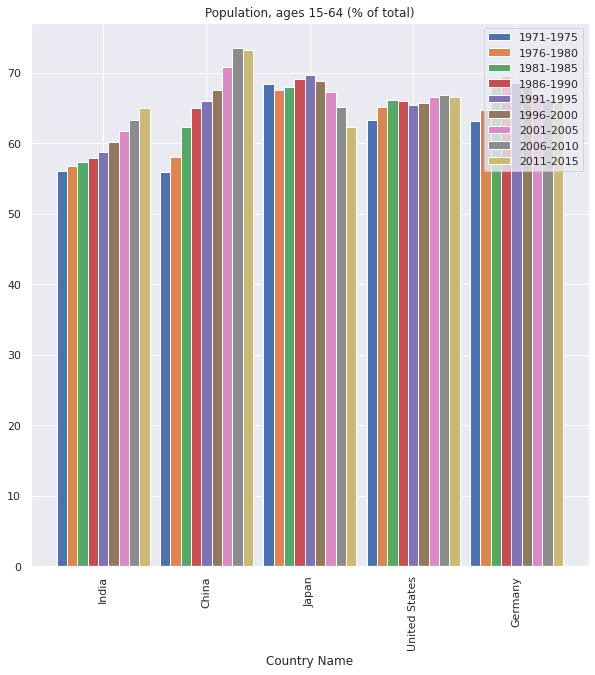

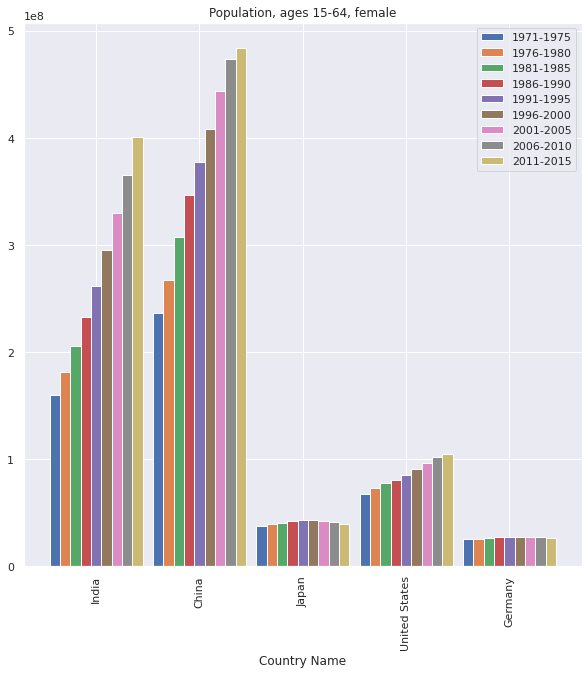

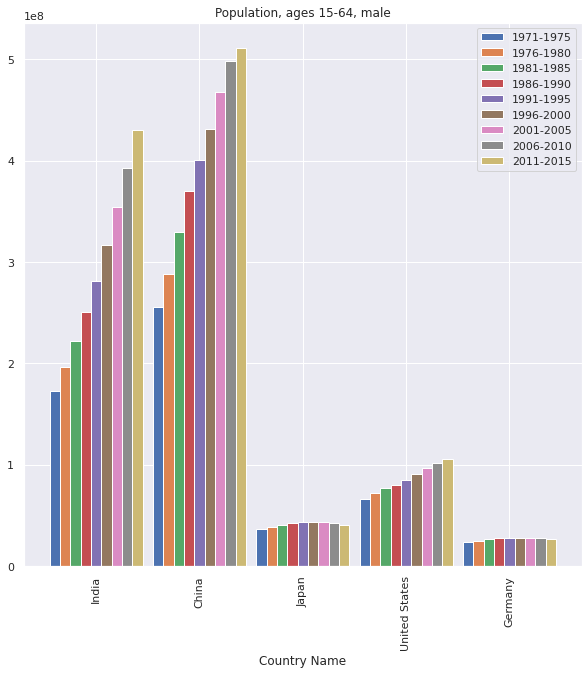

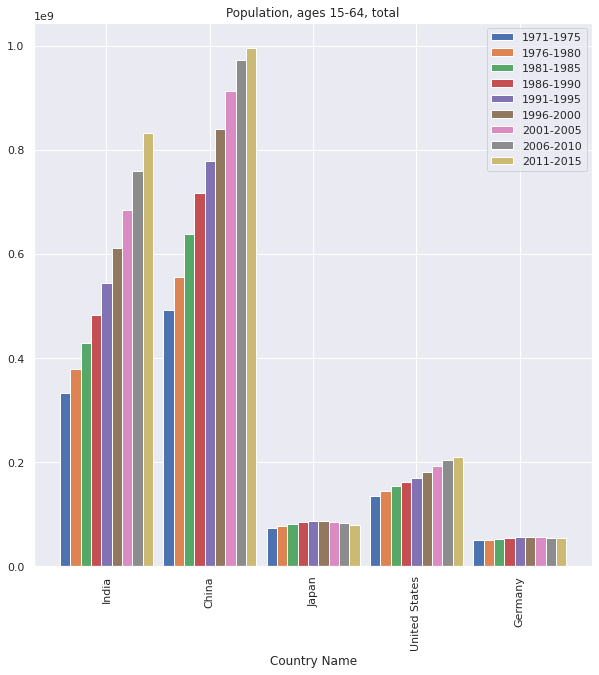

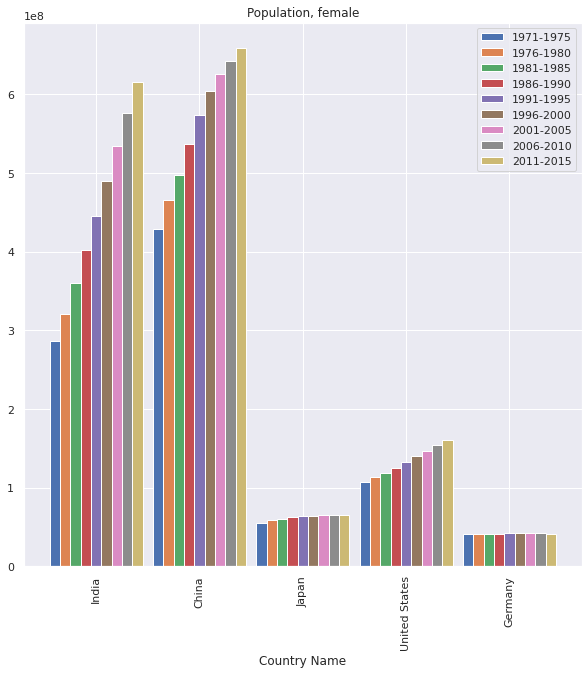

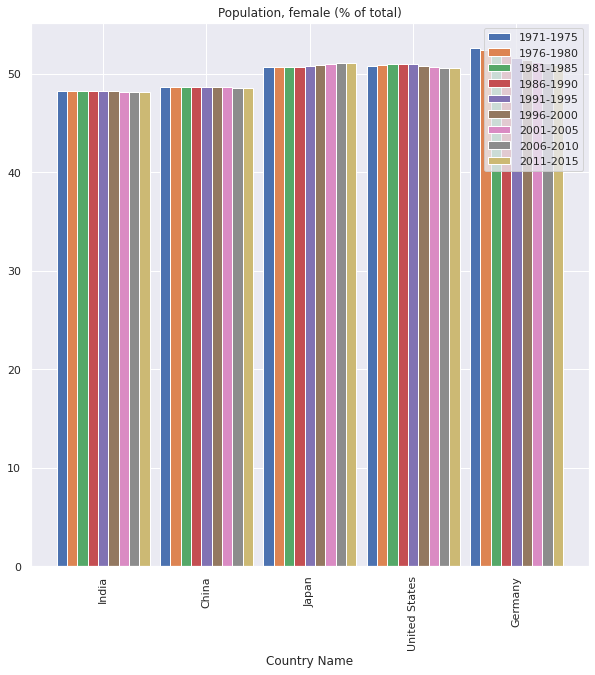

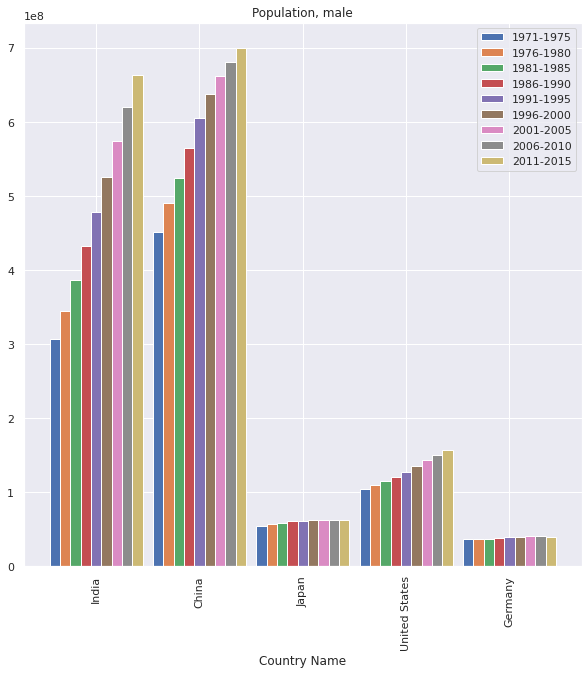

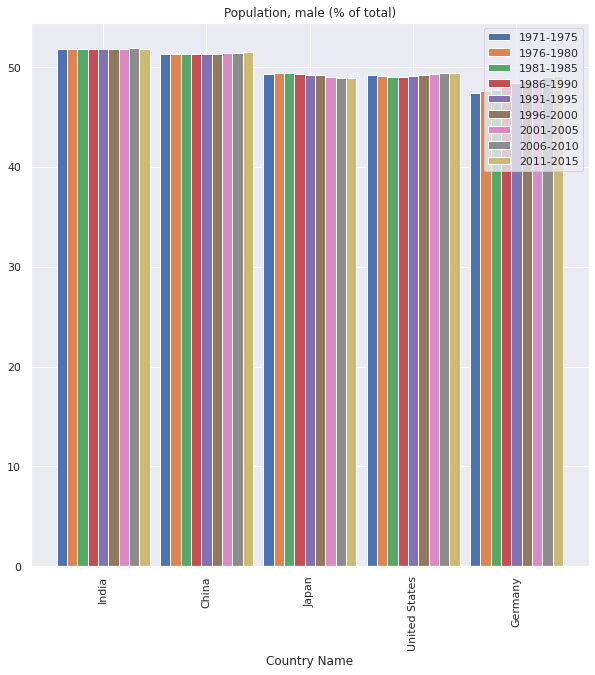

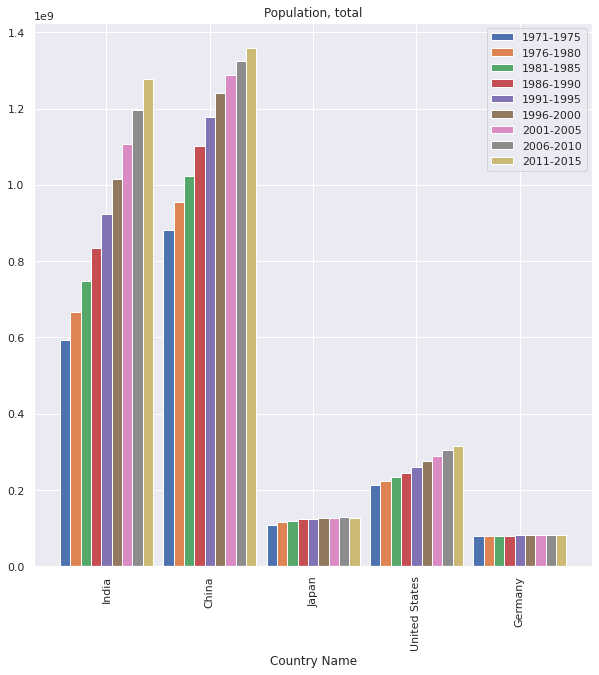

In [55]:
S_No=0
for indicator in selected_countries_df['Indicator Name'].unique():
  if '(years)' not in indicator:
    dff=selected_countries_df[selected_countries_df['Indicator Name']==indicator].set_index('Country Name')
    dff.drop(['Country Code',	'Indicator Name',	'Indicator Code'], axis=1, inplace=True)
    S_No+=1
    print(f'S_No.{S_No};  indicator Name {indicator}.')
    dff.plot.bar(figsize=(10, 10), title= indicator ,width=0.9)

In [56]:
print('############################Shape: \n', EdStatsFootNote_df.shape )
print('############################info:')
print(EdStatsFootNote_df.info())
print('############################Description:\n',EdStatsFootNote_df.describe())
EdStatsFootNote_df.head()

############################Shape: 
 (643638, 5)
############################info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB
None
############################Description:
        Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [57]:
#Filtering the data
EdStatsFootNote_df.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [58]:
#remove Unnamed: 4 as it has all values equal to null
EdStatsFootNote_df.drop("Unnamed: 4",axis=1, inplace=True)

In [59]:
print('############################Shape: \n', EdStatsSeries_df.shape )
print('############################info:')
print(EdStatsSeries_df.info())
print('############################Description:\n',EdStatsSeries_df.describe())
EdStatsSeries_df.head()

############################Shape: 
 (3665, 21)
############################info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations an

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [60]:
#Filteration of the data
EdStatsSeries_df.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [61]:
#remove Unnamed: 4 as it has all values equal to null
EdStatsSeries_df.drop(['Unit of measure','Periodicity','Notes from original source','Other web links','Related indicators','License Type','Unnamed: 20'],axis=1, inplace=True)
EdStatsSeries_df.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition Base Period Other notes  \
0  Percentage of female population age 15-19 with...         NaN         NaN   
1  Percentage of population age 15-19 with no edu...         NaN         NaN   
2  Percentage of female population age 15+ with n...         NaN         NaN   
3  Percentage of population age 15+ with no educa...         NaN         NaN   
4  Percentage of female population age 20-24 with...         NaN         NaN   

  Aggregation method Limitations and exceptions General comments  \
0                NaN                        NaN              NaN   
1                NaN                        NaN              NaN   
2                NaN                        NaN              NaN   
3                NaN                        NaN              NaN   
4                NaN                        NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN